In [6]:
%run -i utils.ipynb
d = load_event_log()
d.head()

,date,user_id,event_id,event_name,username,uuid,uuid_trashed,uuid_type,subject,instance,entity_type,event_category
event_log_id,,,,,,,,,,,,
193359,2018-01-01 14:08:08,28,9,discussion/comment/create,petersi,93378,0,comment,Mathe,de,None,commenting
193360,2018-01-01 15:36:17,62384,5,entity/revision/add,Rebi,93379,0,entityRevision,Mathe,de,text-solution,edit
193362,2018-01-01 15:38:00,62384,5,entity/revision/add,Rebi,93380,0,entityRevision,Mathe,de,text-solution,edit
193364,2018-01-01 15:52:31,62384,1,taxonomy/term/associate,Rebi,82047,0,taxonomyTerm,Mathe,de,None,taxonomy-architekt
193365,2018-01-01 15:52:49,62384,10,uuid/trash,Rebi,82695,1,entity,Mathe,de,text-exercise,admin


# Verlauf der Anzahl Bearbeitungen innerhalb von 90 Tagen (alle Sprachversionen / mit gelöschten Inhalten / Neuerstellungen + Bearbeitungen) auf Serlo 

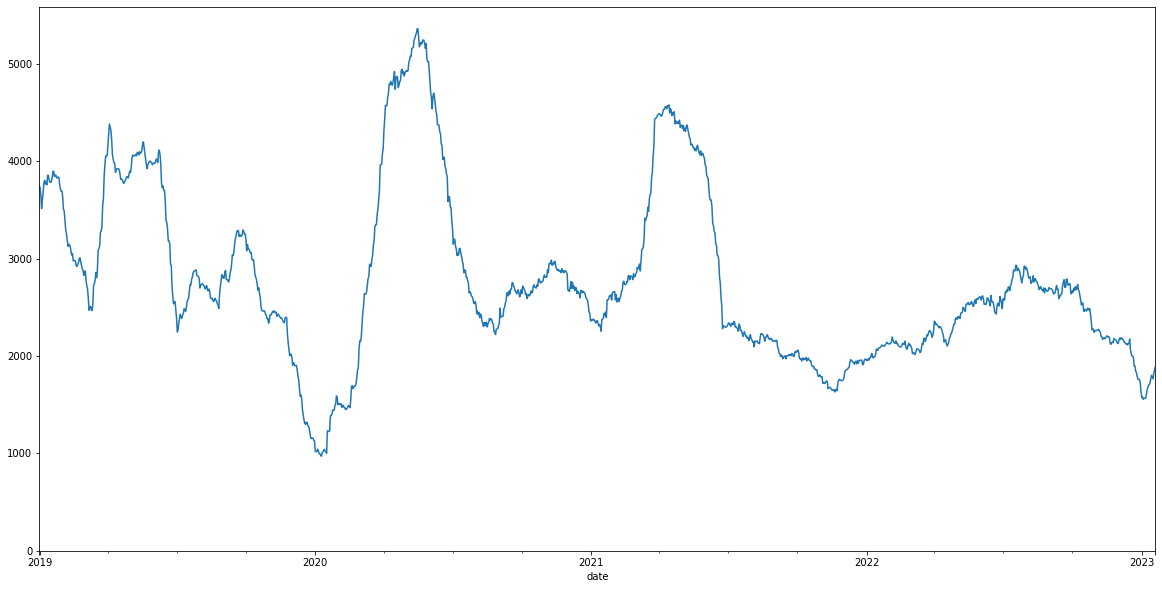

In [23]:
def show(df, since="2019-01-01", subject=None, timedelta=90, event_id=None, trashed=None, instance=None, entity_type=None):
    d = df.copy()
    
    d = d[d["date"] > pd.to_datetime(since) - pd.Timedelta(days=timedelta)]
    d = d[d["event_category"] == "edit"]
    
    if instance:
        d = d[d["instance"] == instance]
    
    if subject:
        d = d[d["subject"] == subject]
    
    if entity_type:
        d = d[d["entity_type"] == entity_type]
    
    if trashed:
        d = d[d["uuid_trashed"] == trashed]
        
    if event_id:
        d = d[d["event_id"] == event_id]
        
    if len(d) < 10:
        m("Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen")
        return
    
    d = d[["date", "username"]]
    d.set_index("date", inplace=True)
    d = d.resample("D").count().rolling(timedelta).sum()
    d.dropna(inplace=True)
    
    try:
        d["username"].plot(figsize=(20, 10))
        plt.gca().set_ylim(bottom=0)
    
        plt.show()
    except:
        m("Error while rendering diagram")
    
show(d)

# Verlauf: Neu erstellt vs bestehendes bearbeitet

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (alle Sprachversionen; Nur Neuerstellungen; gelöscht + nicht gelöscht)

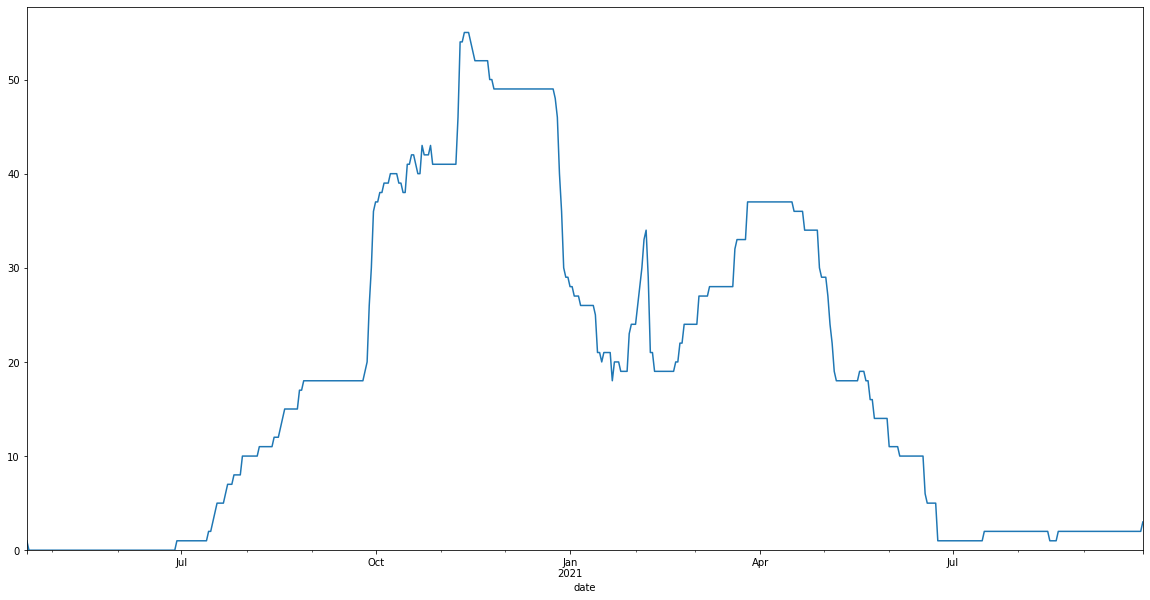

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (alle Sprachversionen; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

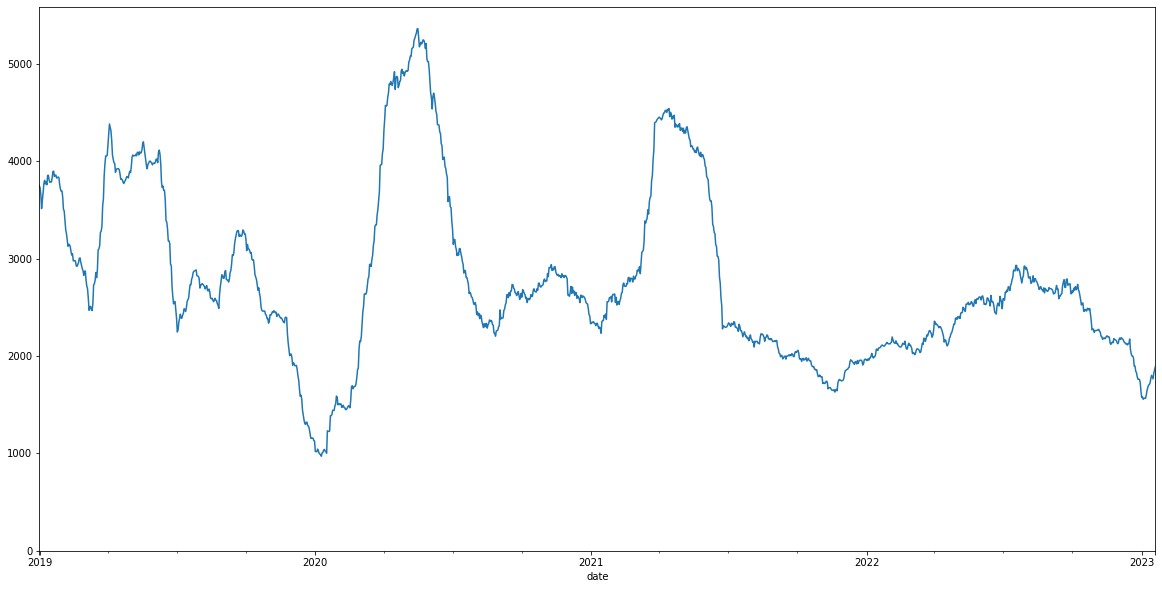

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (alle Sprachversionen; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

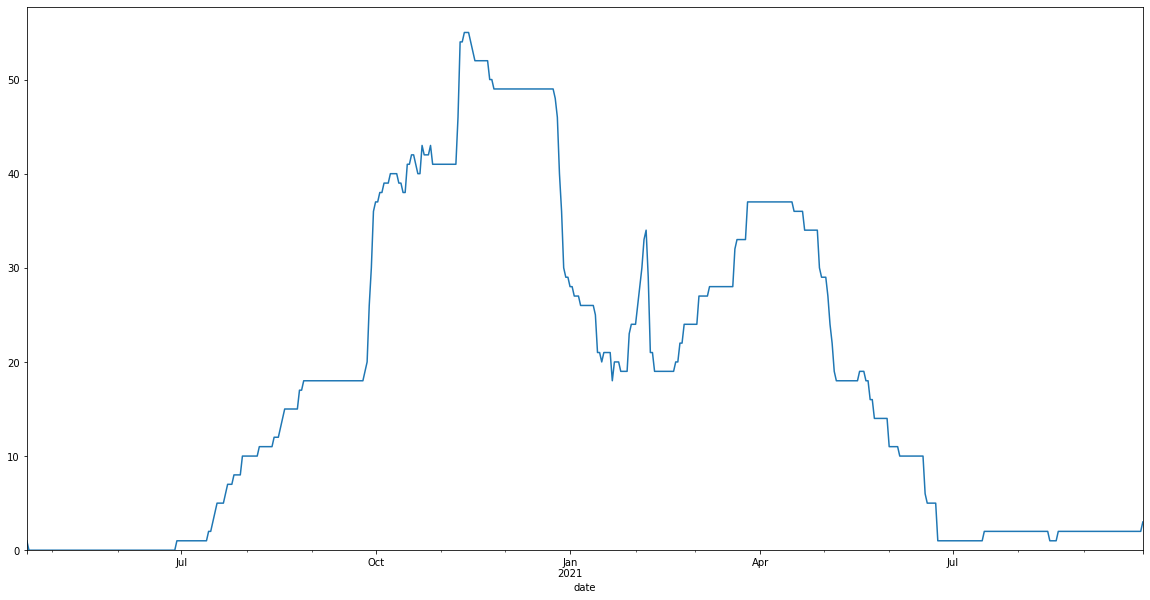

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (alle Sprachversionen; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

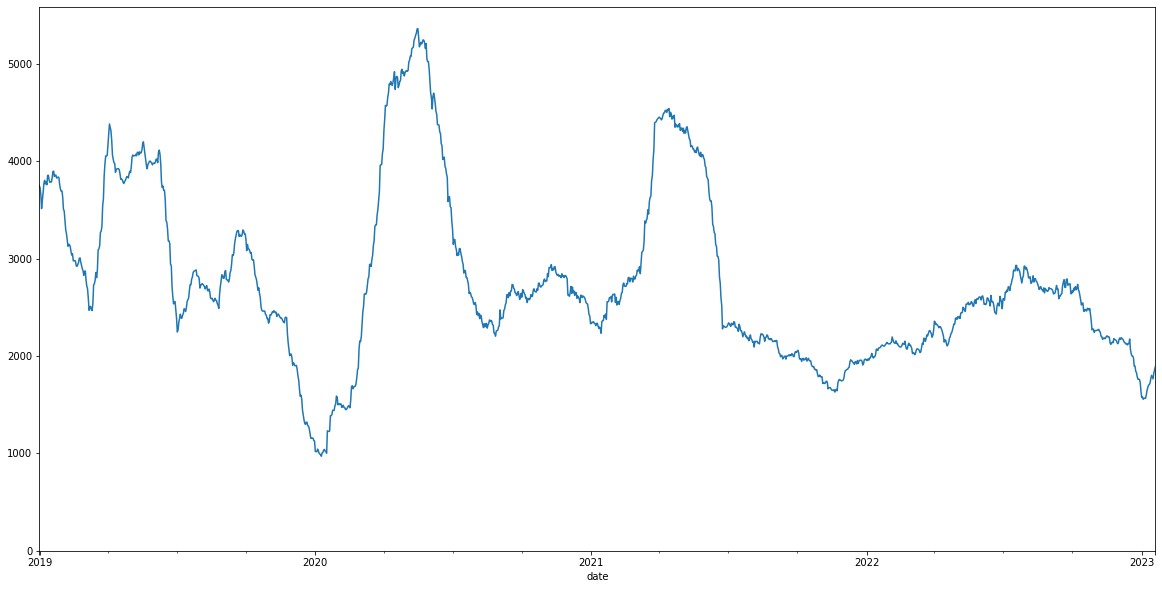

In [8]:
for trashed in [None, 0]:
    trashed_message = "gelöscht + nicht gelöscht" if trashed == None else "nur nicht gelöschte Inhalte"
    
    for event_id in [4, 5]:
        event_message = "Nur Neuerstellungen" if event_id == 4 else "Nur Bearbeitungen bestehender Inhalte"
        
        m(f"## Verlauf Anzahl Bearbeitungen Summe 90 Tage (alle Sprachversionen; {event_message}; {trashed_message})")
        show(d, event_id=event_id, trashed=trashed)

# Verlauf nach Sprachversion

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

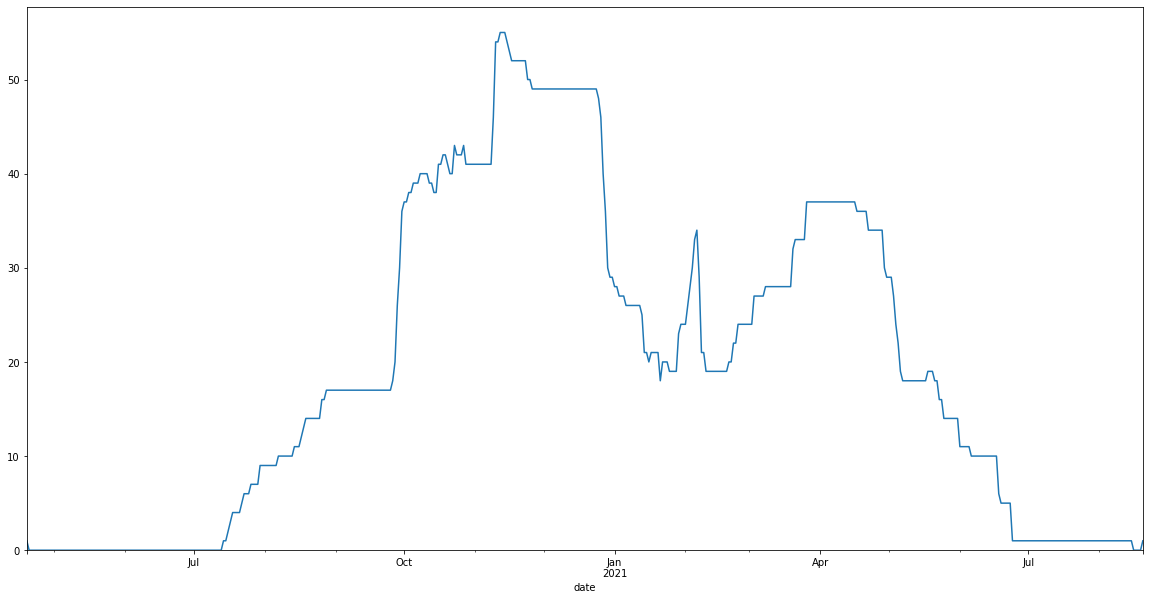

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

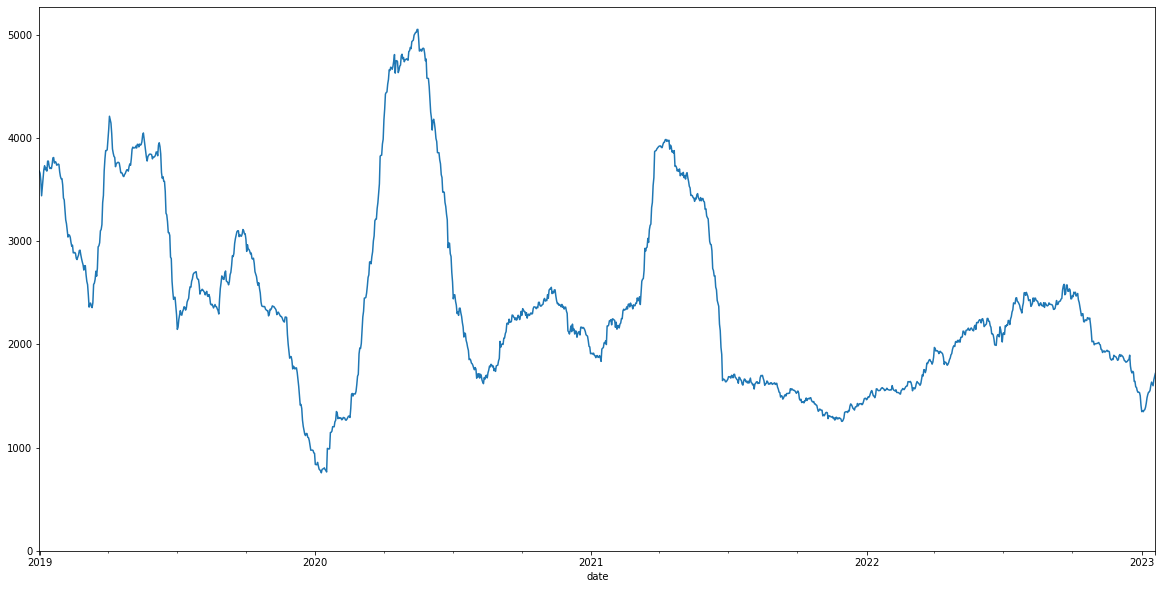

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

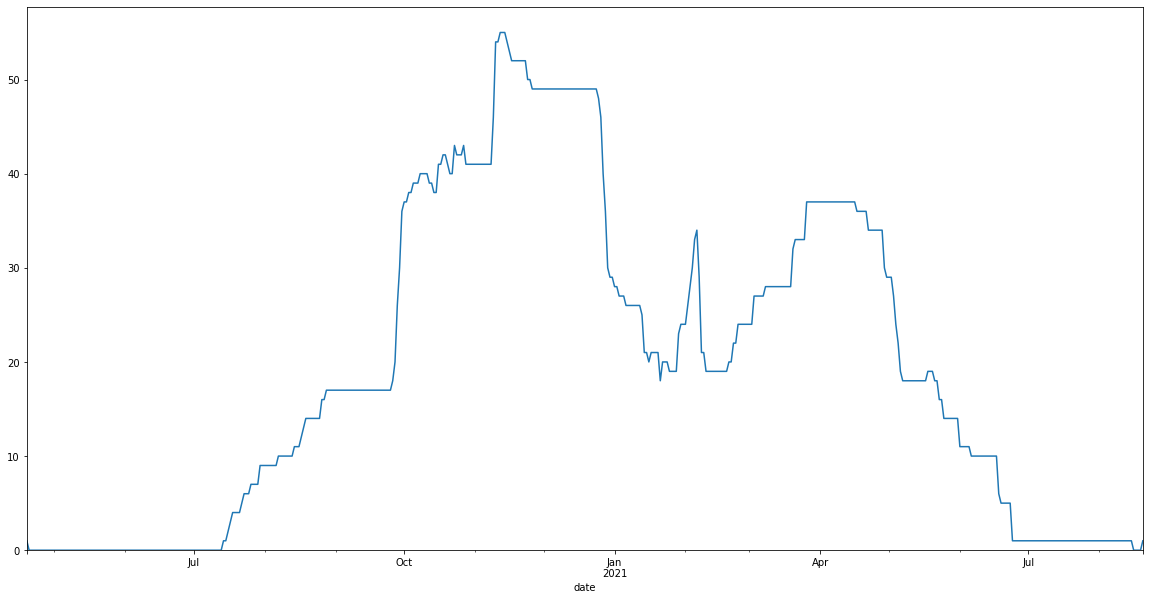

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

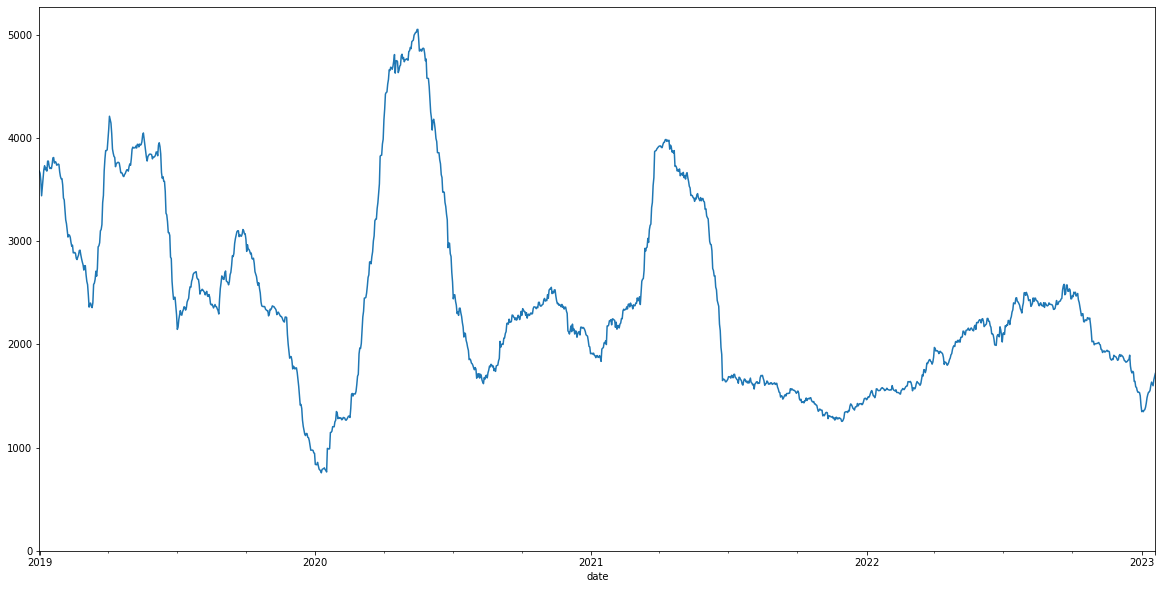

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=en; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=en; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

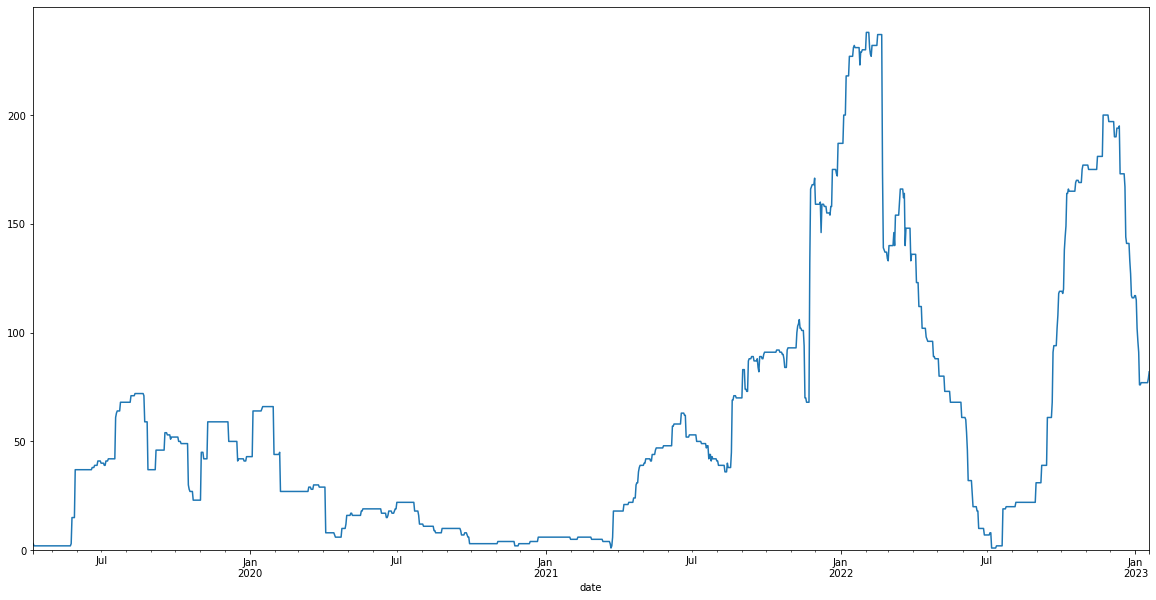

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=en; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=en; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

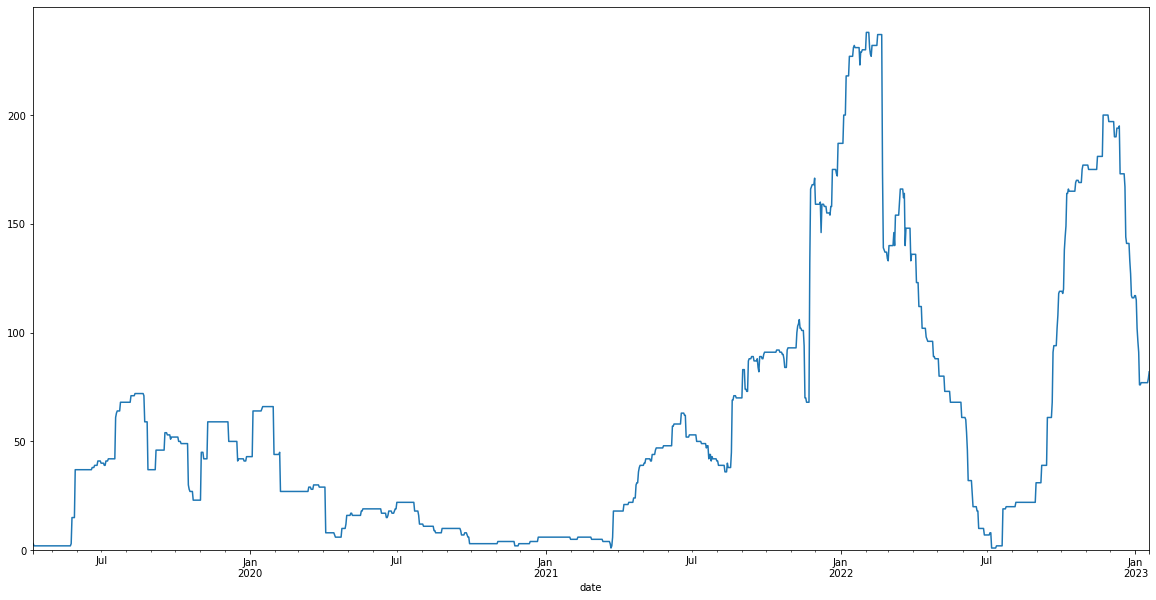

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=ta; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=ta; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

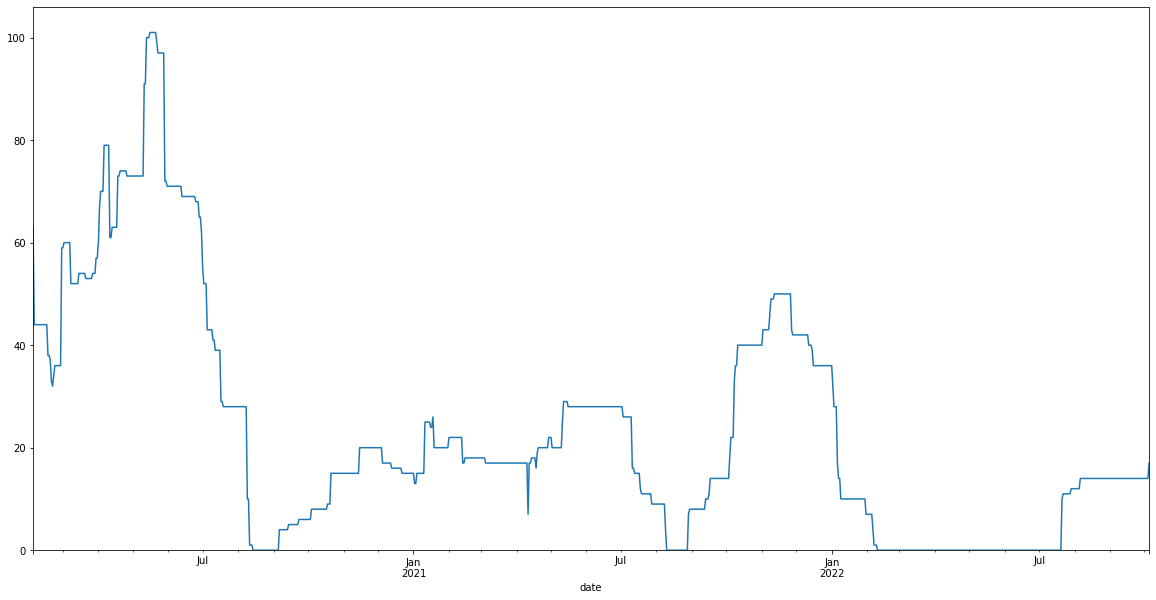

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=ta; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=ta; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

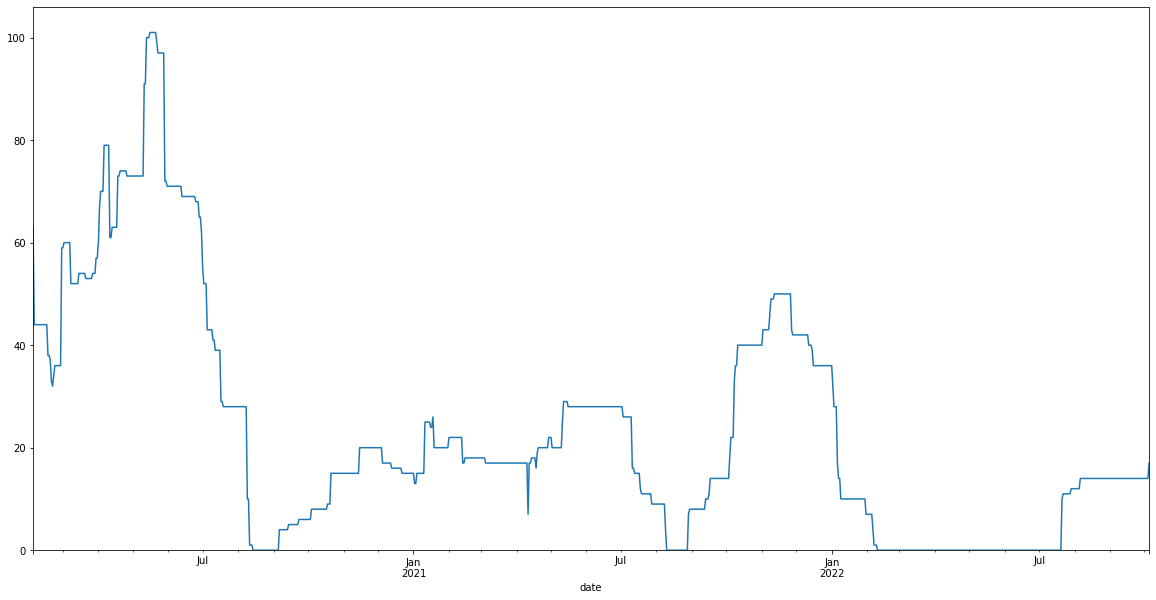

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=fr; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=fr; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

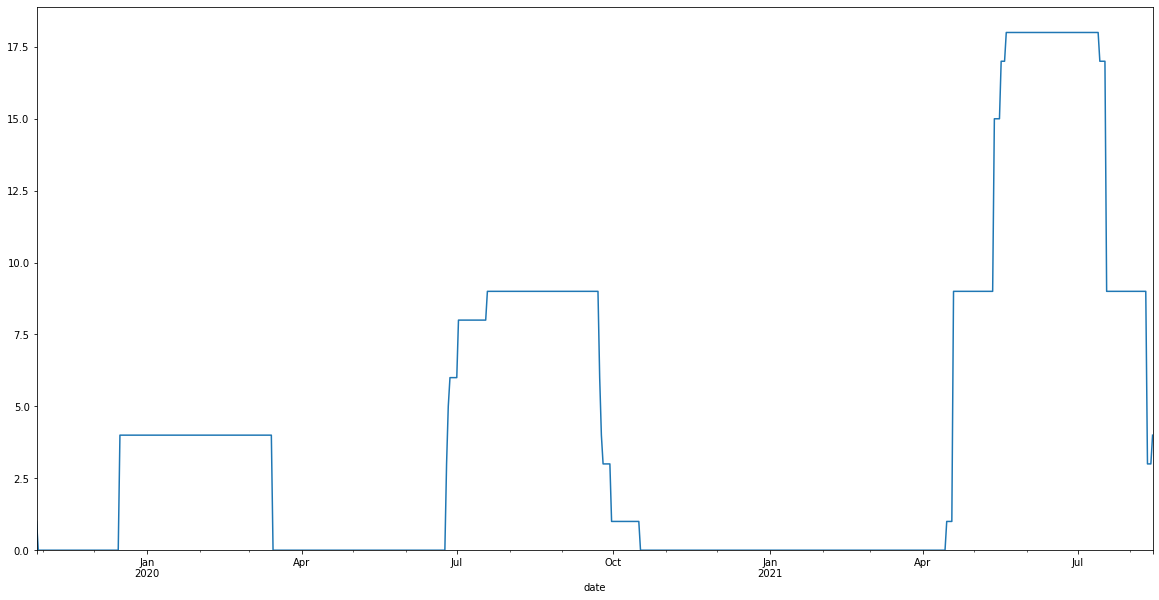

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=fr; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=fr; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

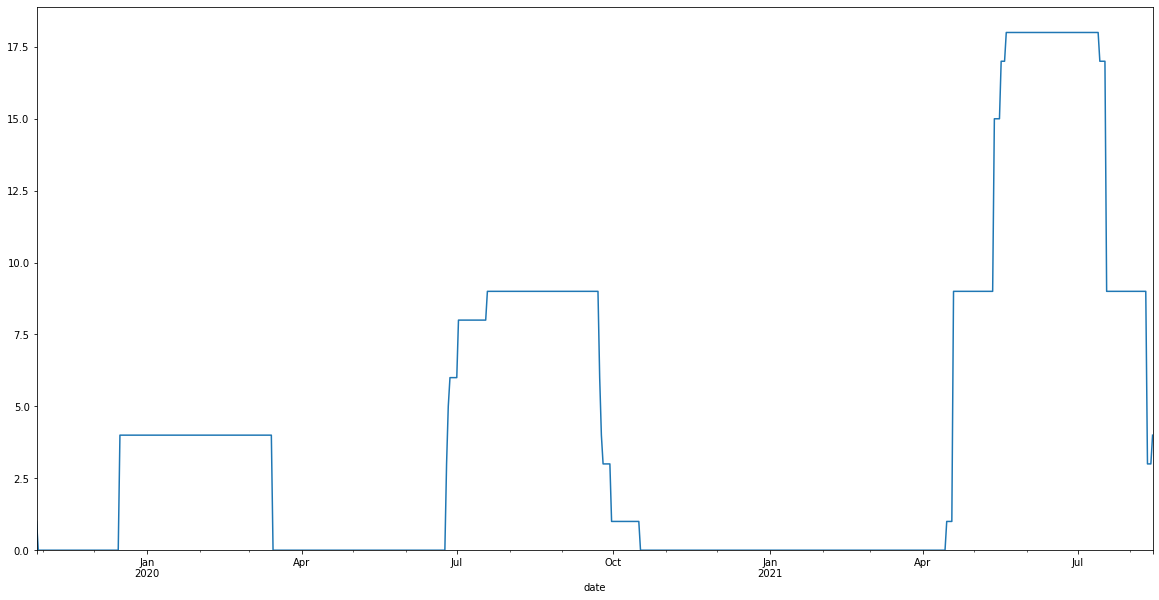

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=es; Nur Neuerstellungen; gelöscht + nicht gelöscht)

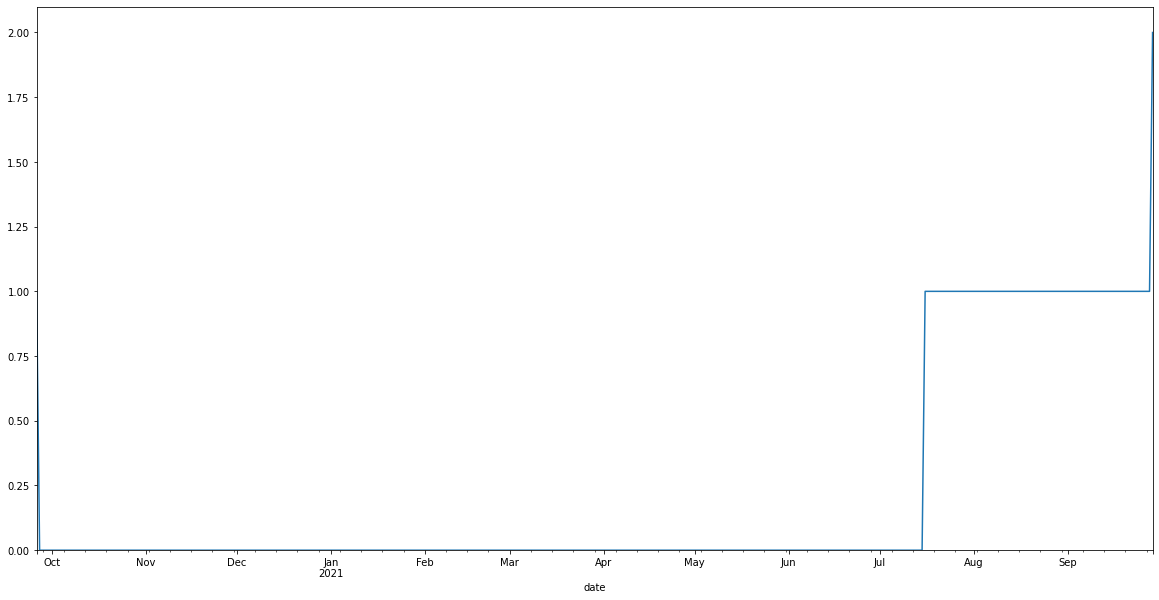

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=es; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

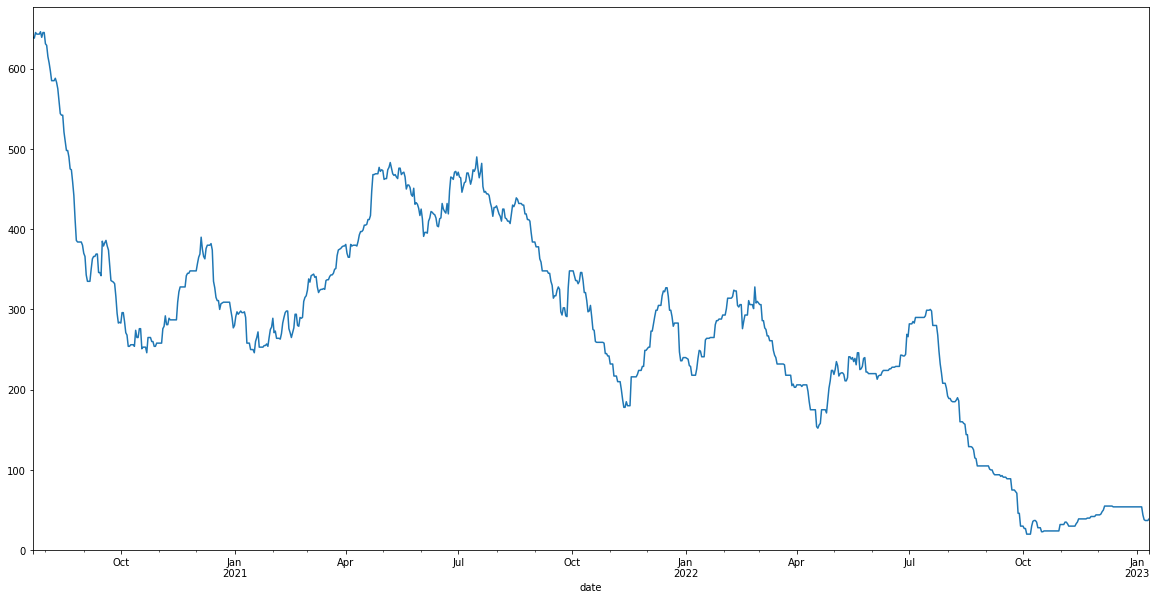

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=es; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

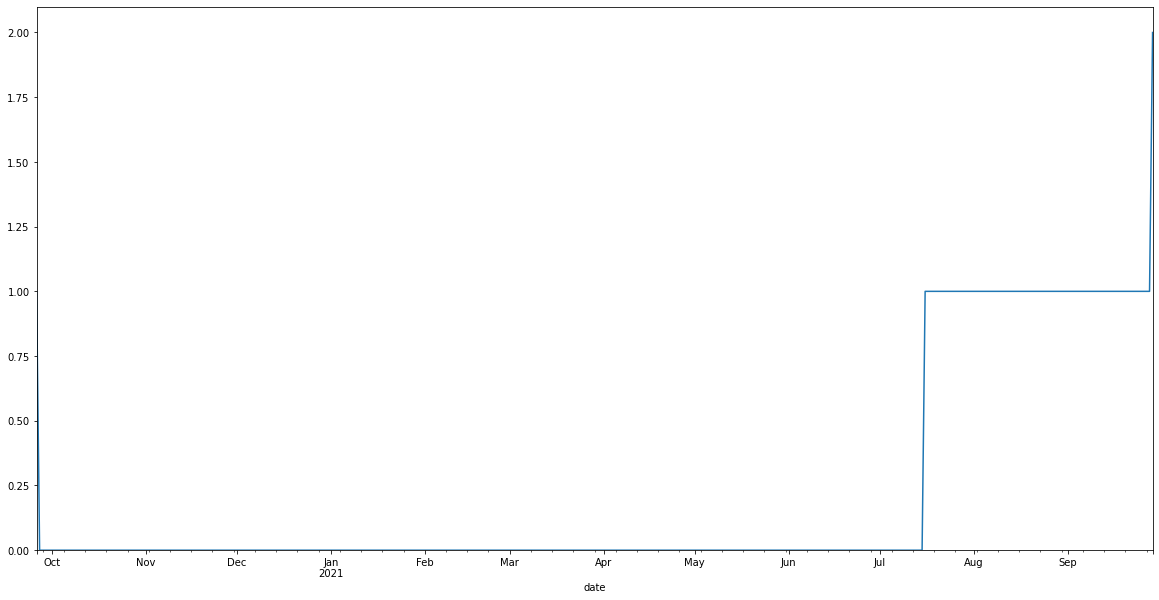

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=es; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

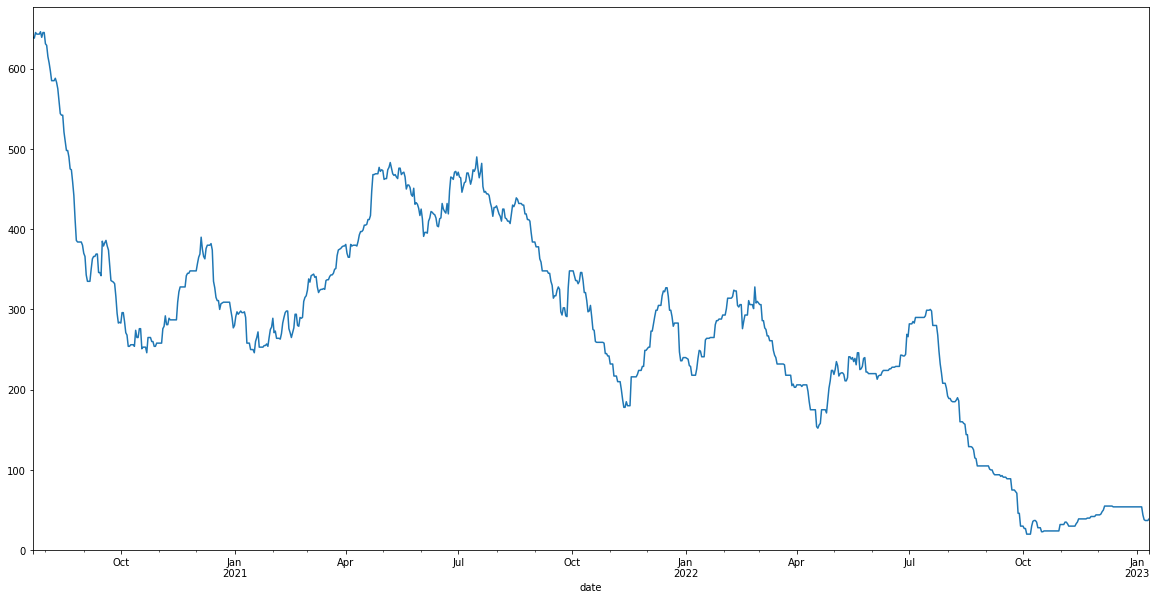

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=hi; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=hi; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=hi; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=hi; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

In [12]:
def remove_none(lst):
    return [x for x in lst if x != None]

for instance in remove_none(d["instance"].unique()):
    for trashed in [None, 0]:
        trashed_message = "gelöscht + nicht gelöscht" if trashed == None else "nur nicht gelöschte Inhalte"

        for event_id in [4, 5]:
            event_message = "Nur Neuerstellungen" if event_id == 4 else "Nur Bearbeitungen bestehender Inhalte"

            m(f"## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion={instance}; {event_message}; {trashed_message})")
            show(d, event_id=event_id, trashed=trashed, instance=instance)

# Verlauf Bearbeitungen in den Fächern

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Mathe; Nur Neuerstellungen; gelöscht + nicht gelöscht)

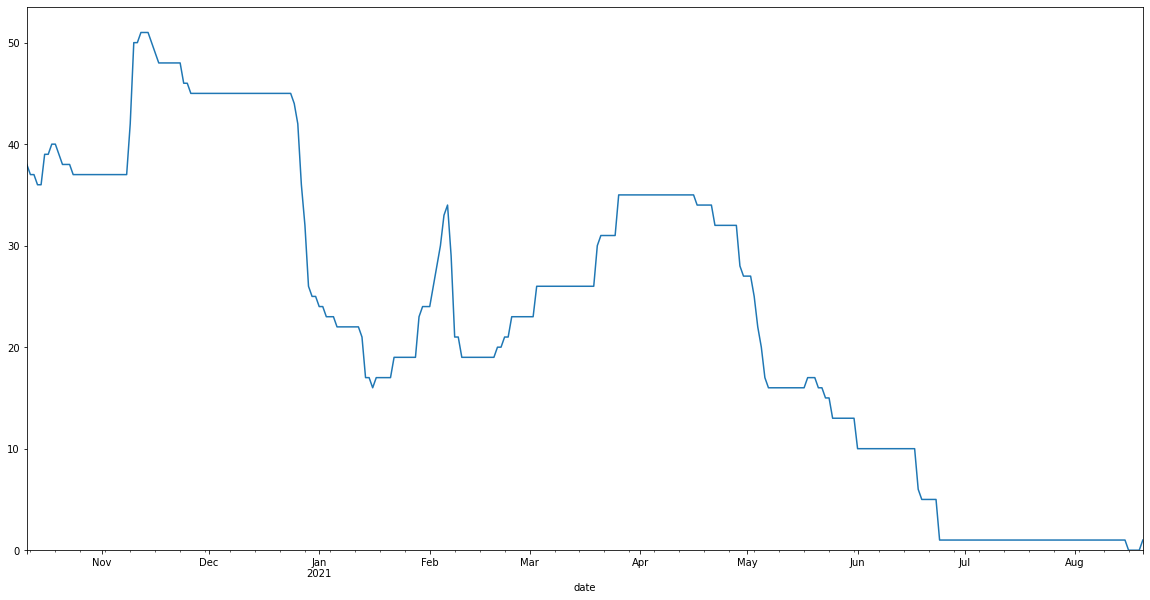

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Mathe; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

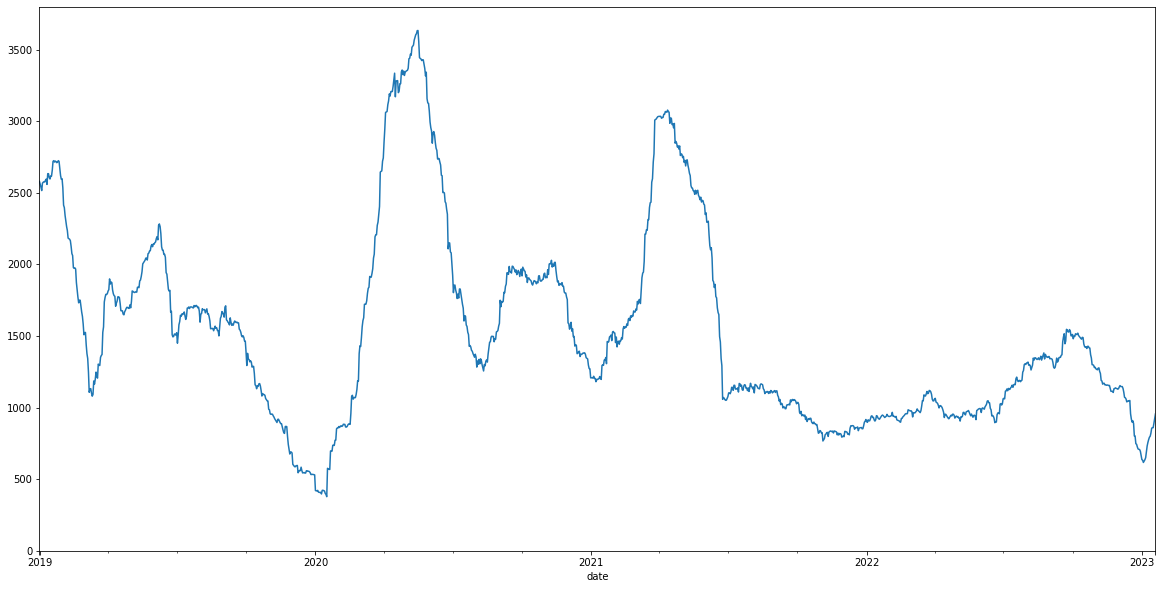

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Mathe; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

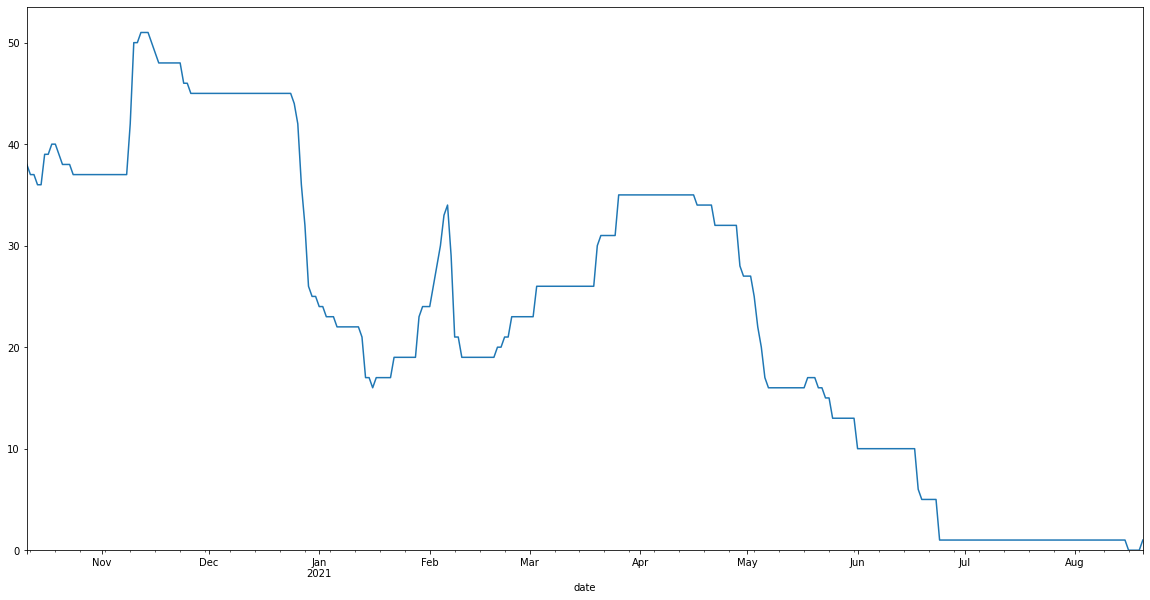

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Mathe; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

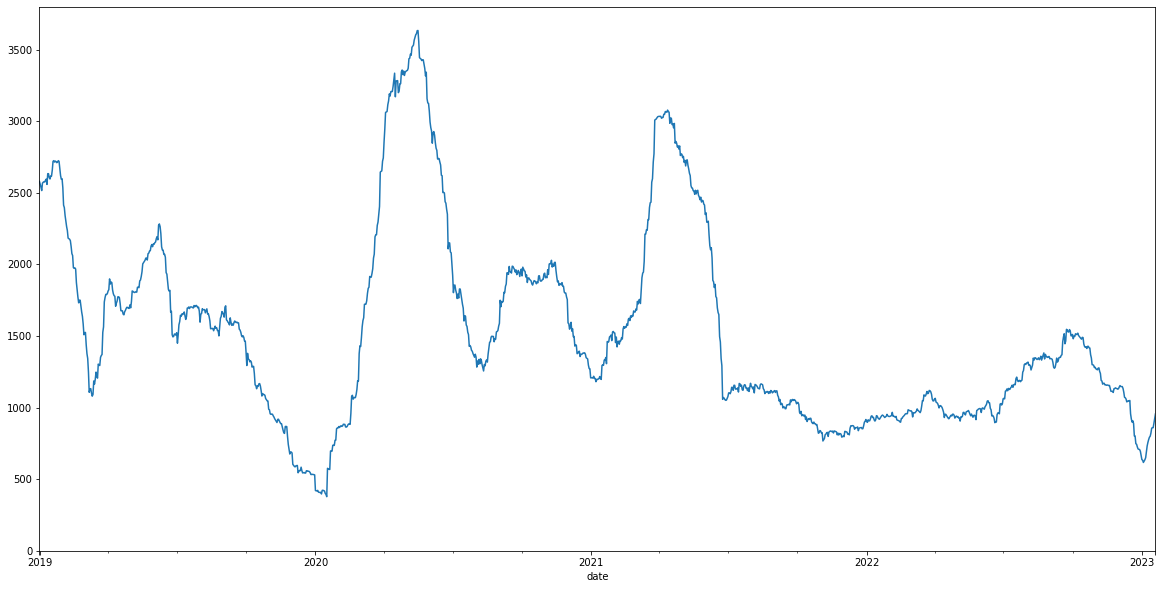

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Biologie; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Biologie; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

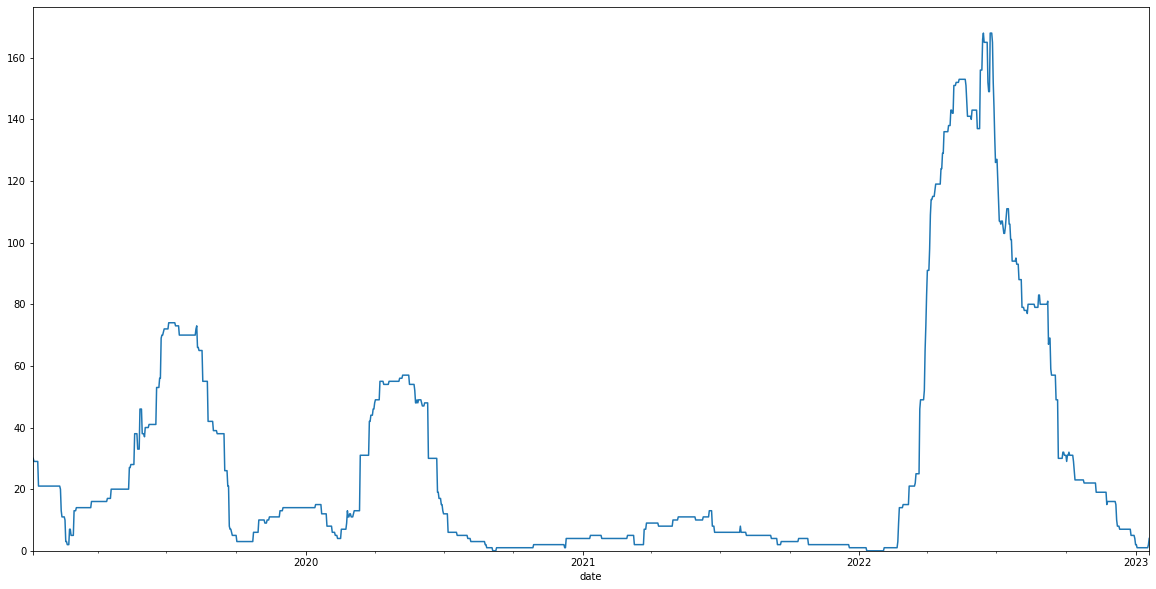

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Biologie; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Biologie; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

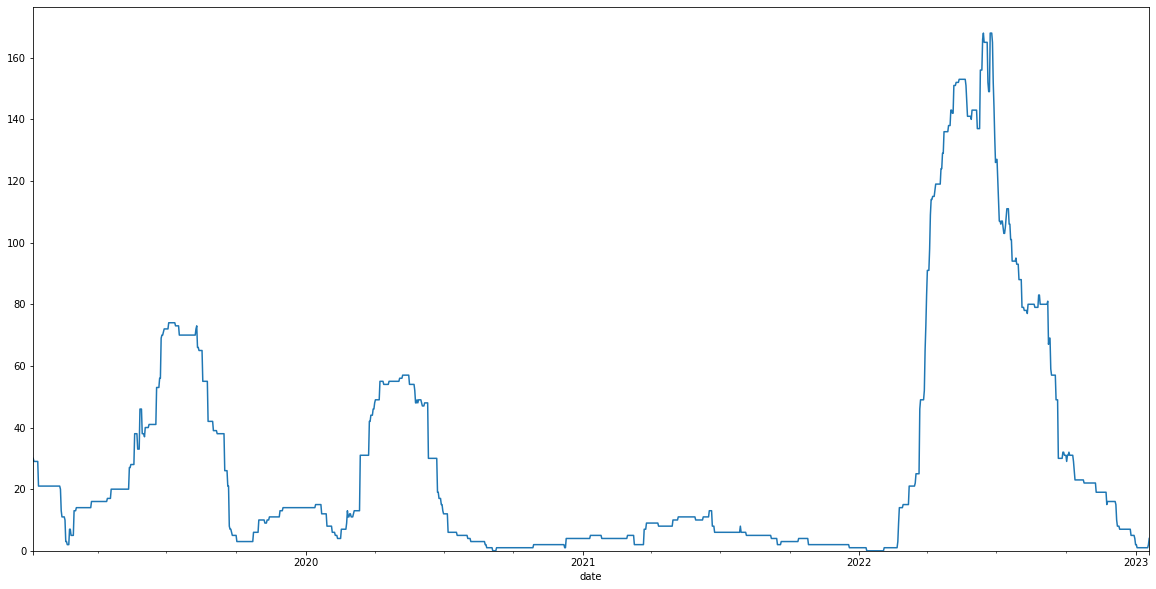

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Community; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Community; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

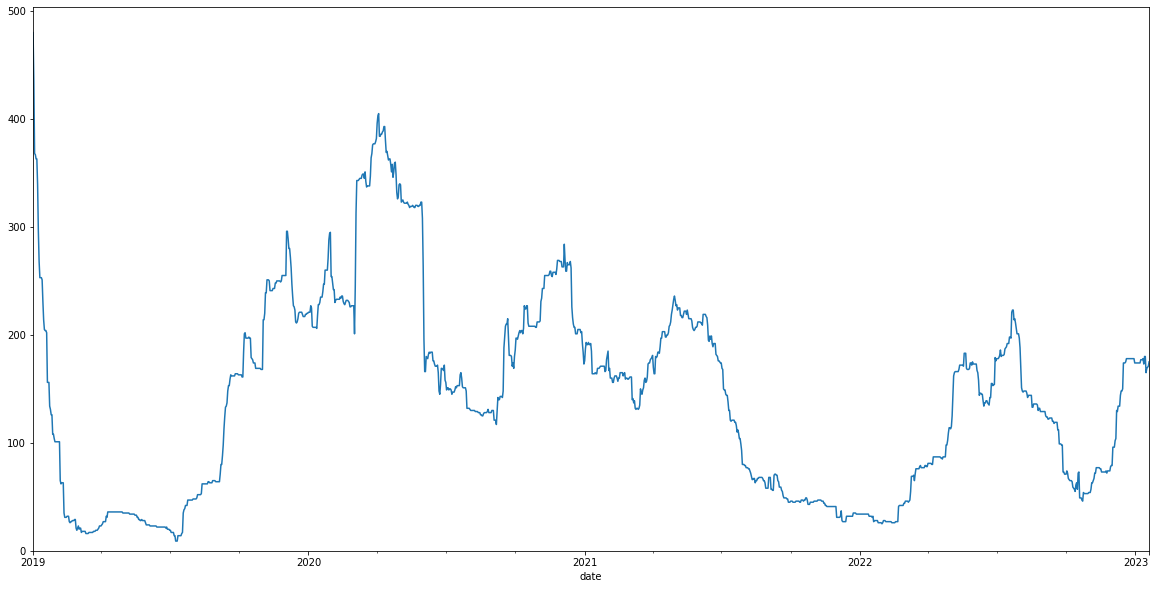

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Community; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Community; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

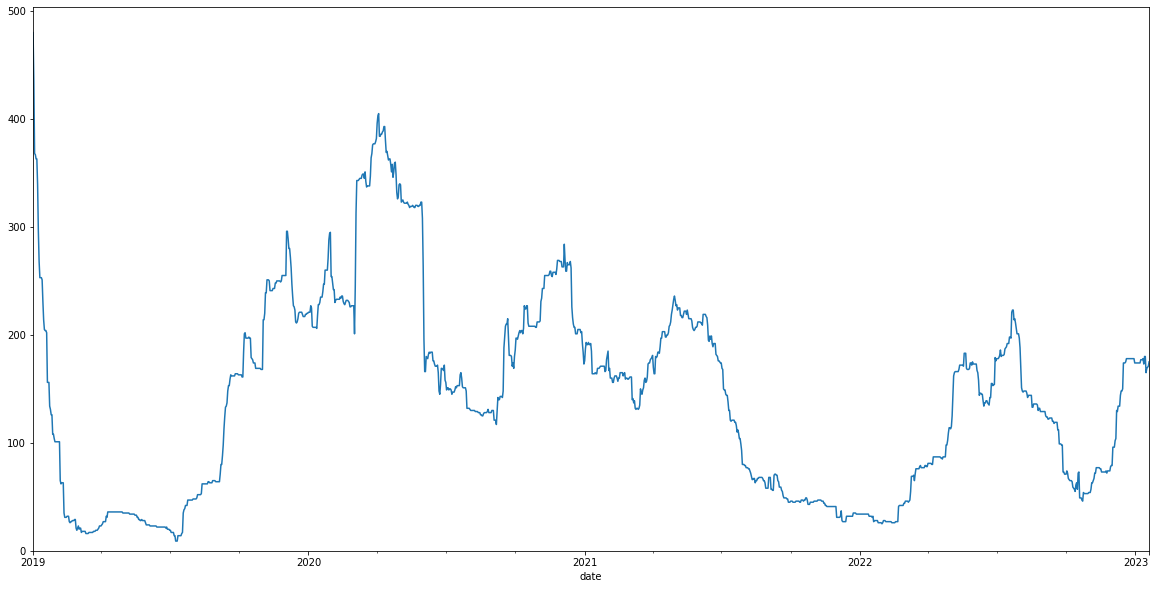

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Informatik; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Informatik; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

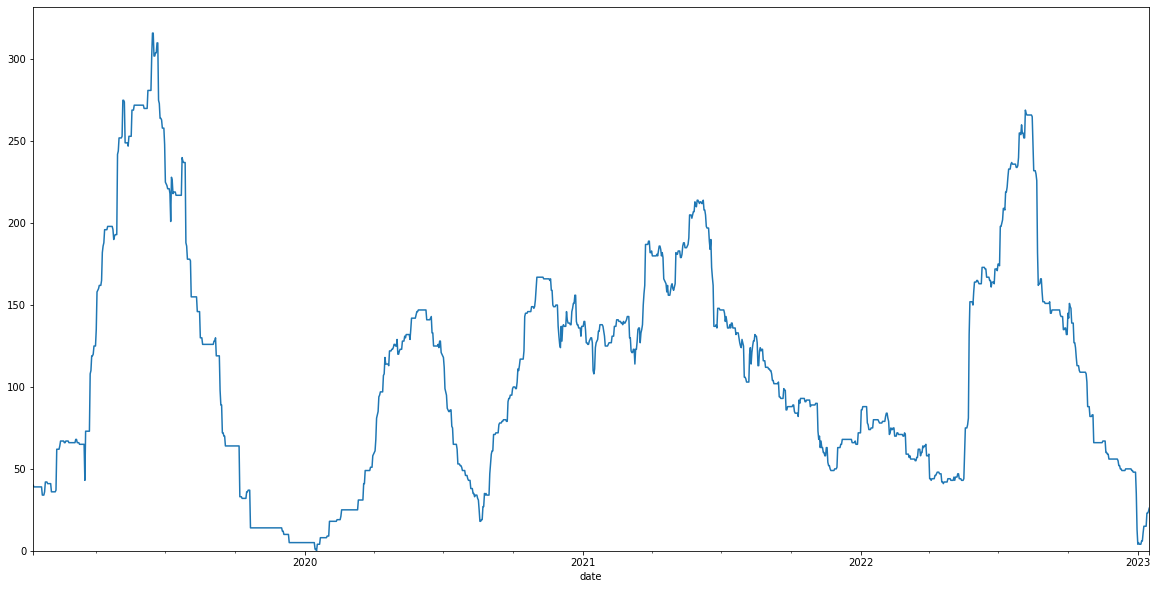

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Informatik; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Informatik; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

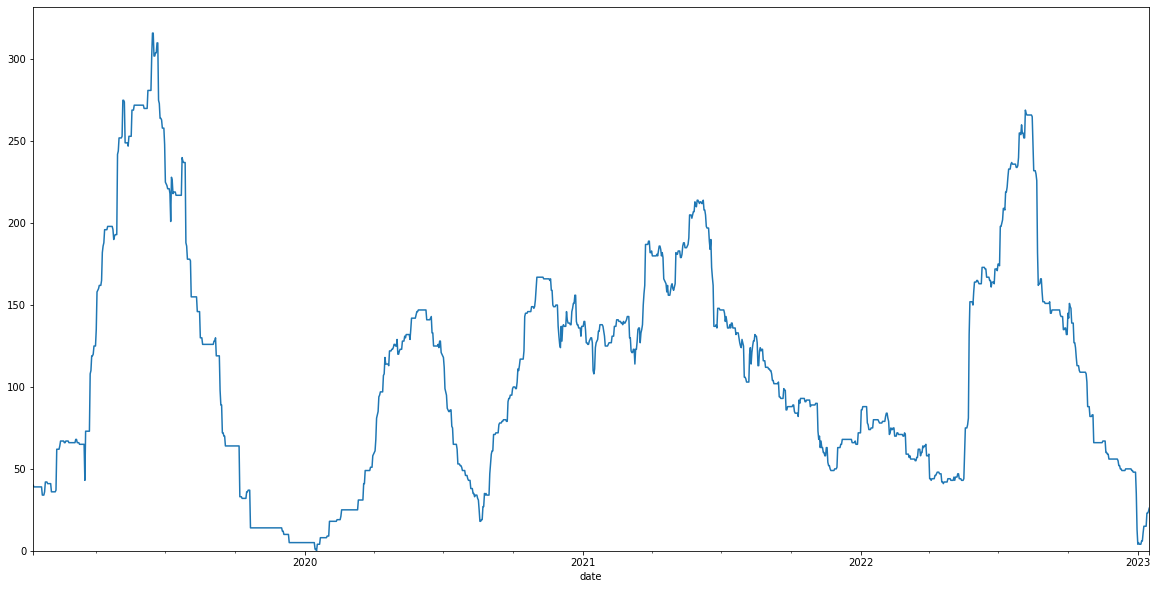

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion=Nachhaltigkeit; Nur Neuerstellungen; gelöscht + nicht gelöscht)

ValueError: zero-size array to reduction operation fmin which has no identity

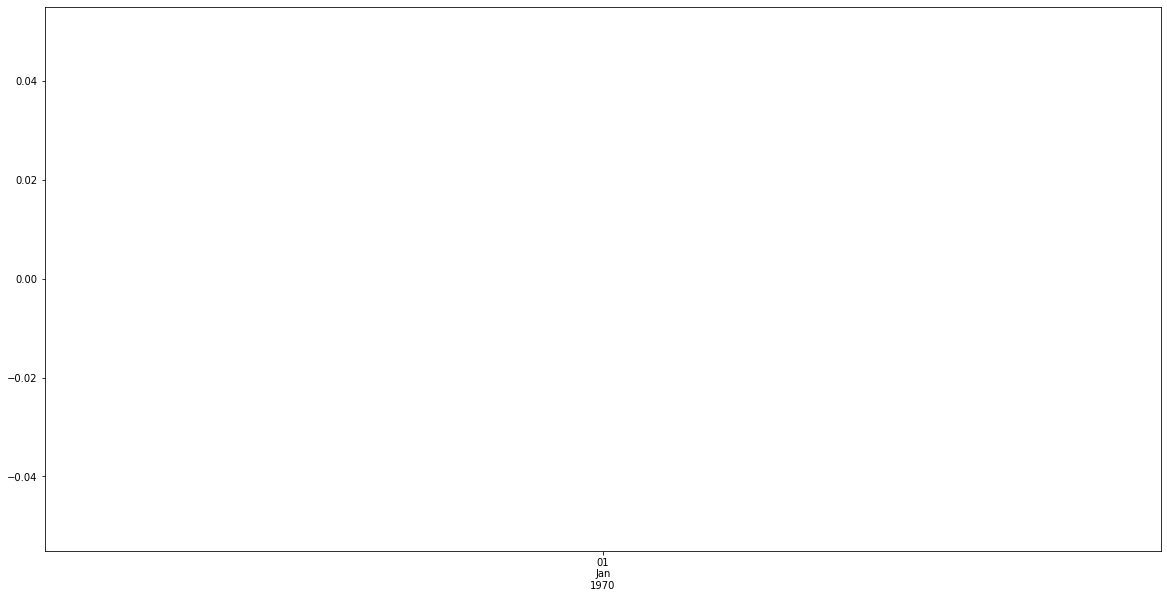

In [13]:
for subject in remove_none(d["subject"].unique()):
    for trashed in [None, 0]:
        trashed_message = "gelöscht + nicht gelöscht" if trashed == None else "nur nicht gelöschte Inhalte"

        for event_id in [4, 5]:
            event_message = "Nur Neuerstellungen" if event_id == 4 else "Nur Bearbeitungen bestehender Inhalte"

            m(f"## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Sprachversion={subject}; {event_message}; {trashed_message})")
            show(d, event_id=event_id, trashed=trashed, subject=subject)

# Verlauf nach Inhaltstyp (Sprachversion = de)

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-solution; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

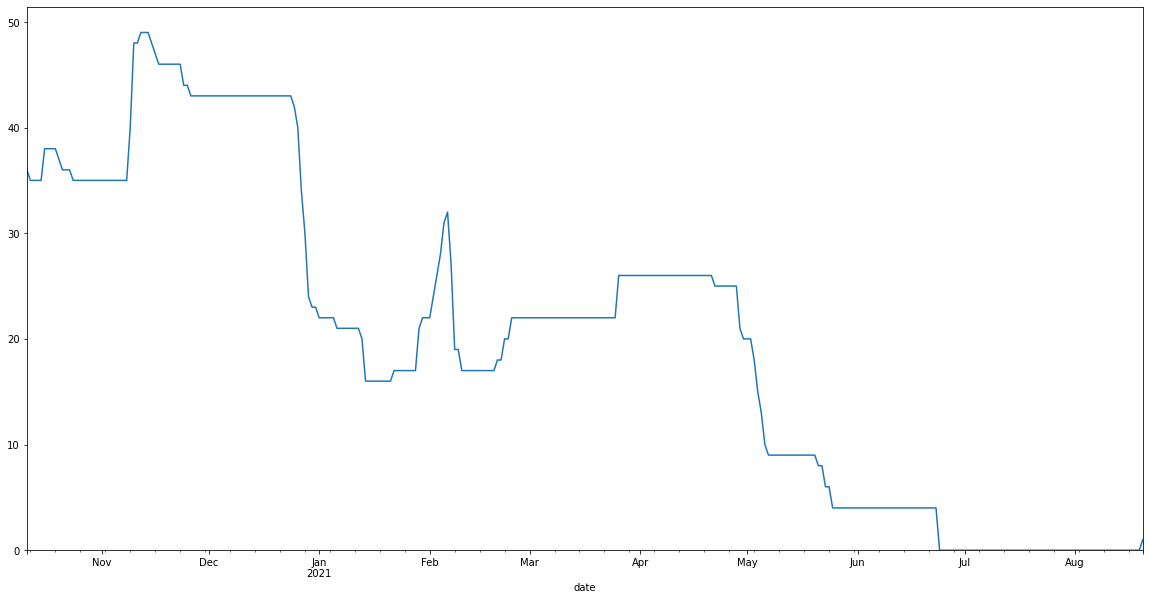

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-solution; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

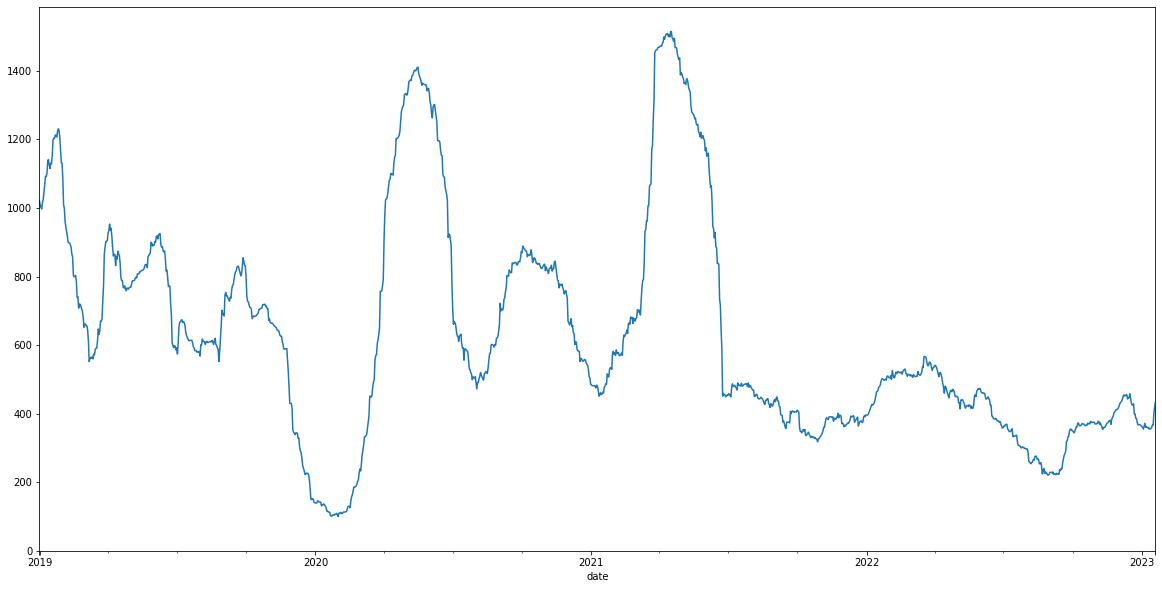

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-solution; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

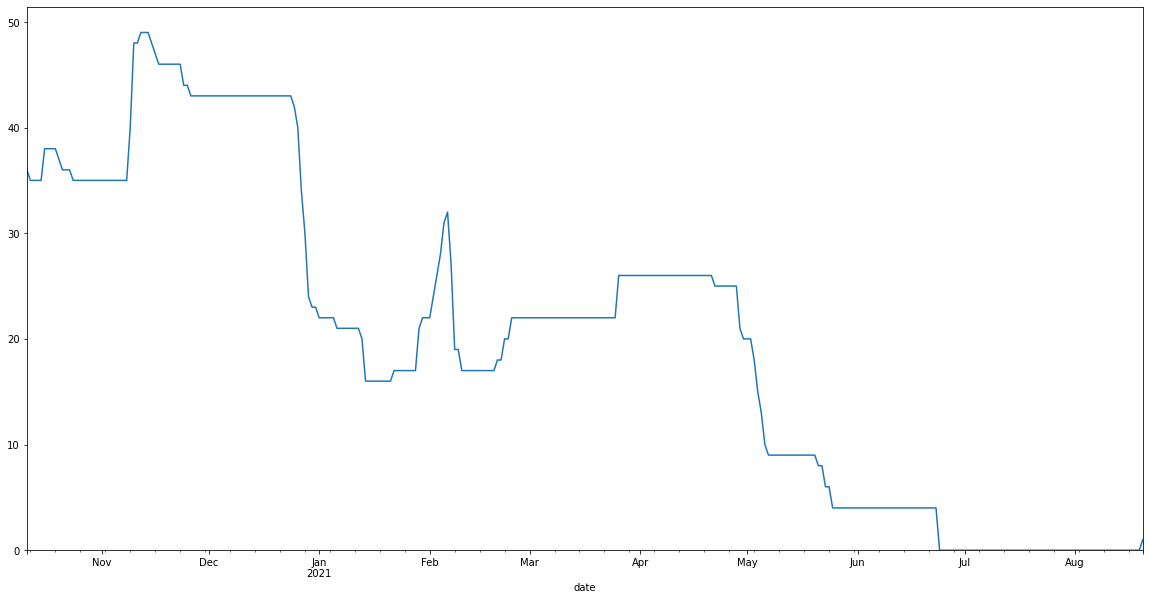

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-solution; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

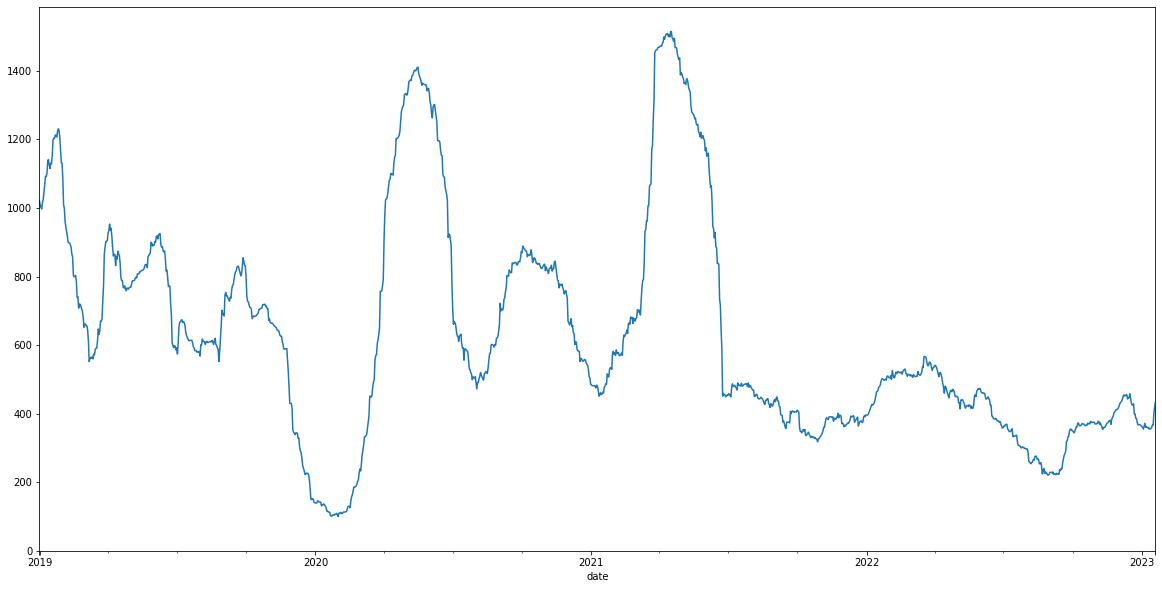

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

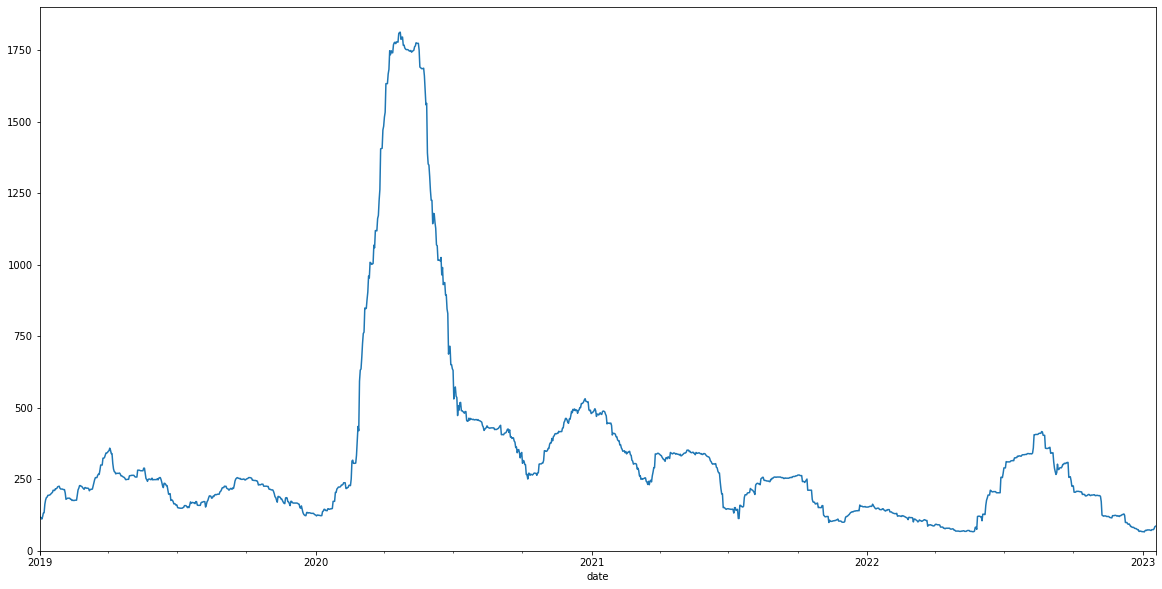

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

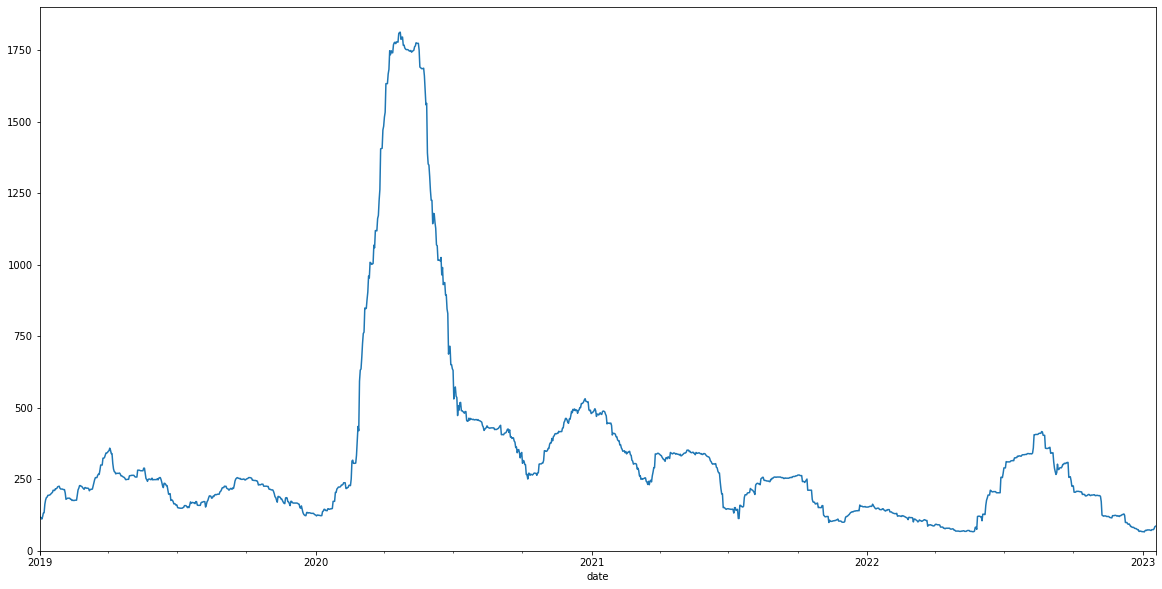

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = article; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = article; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

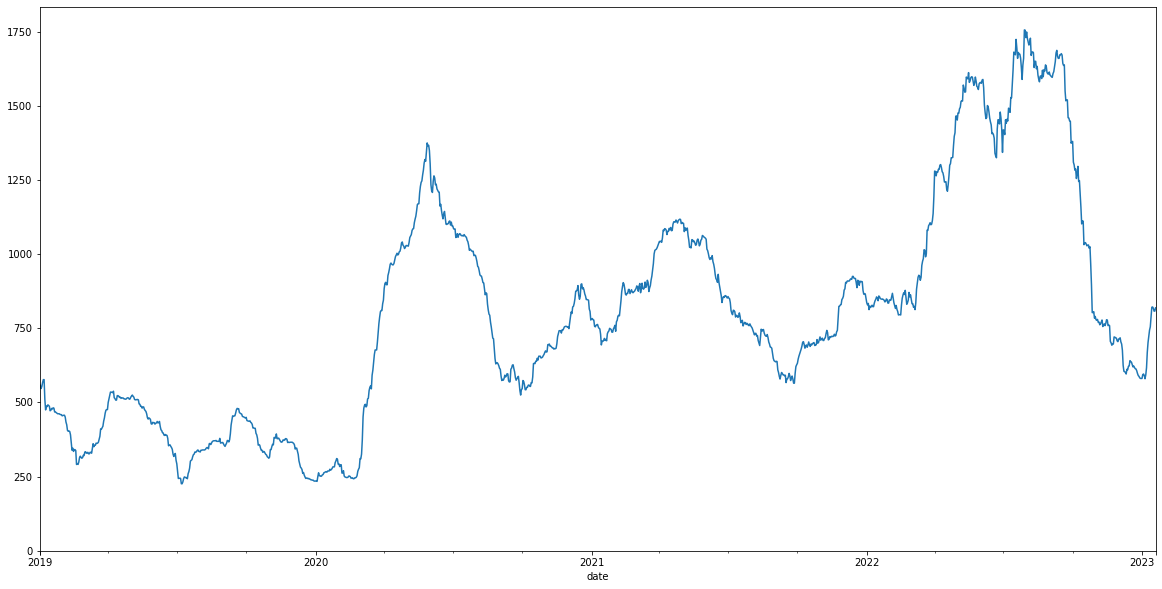

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = article; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = article; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

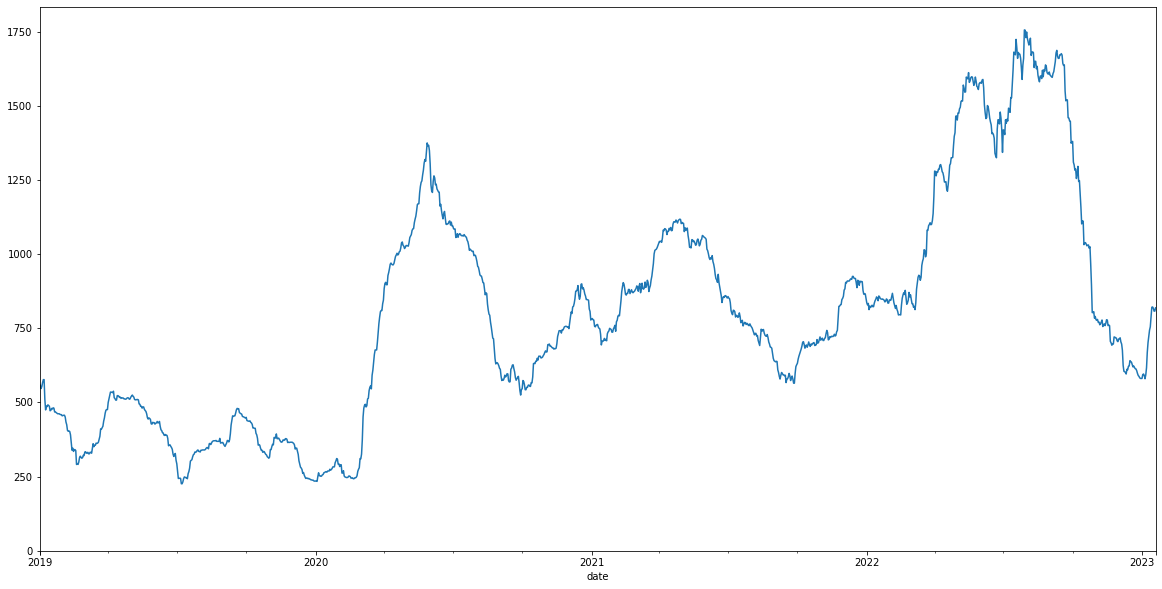

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = grouped-text-exercise; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = grouped-text-exercise; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

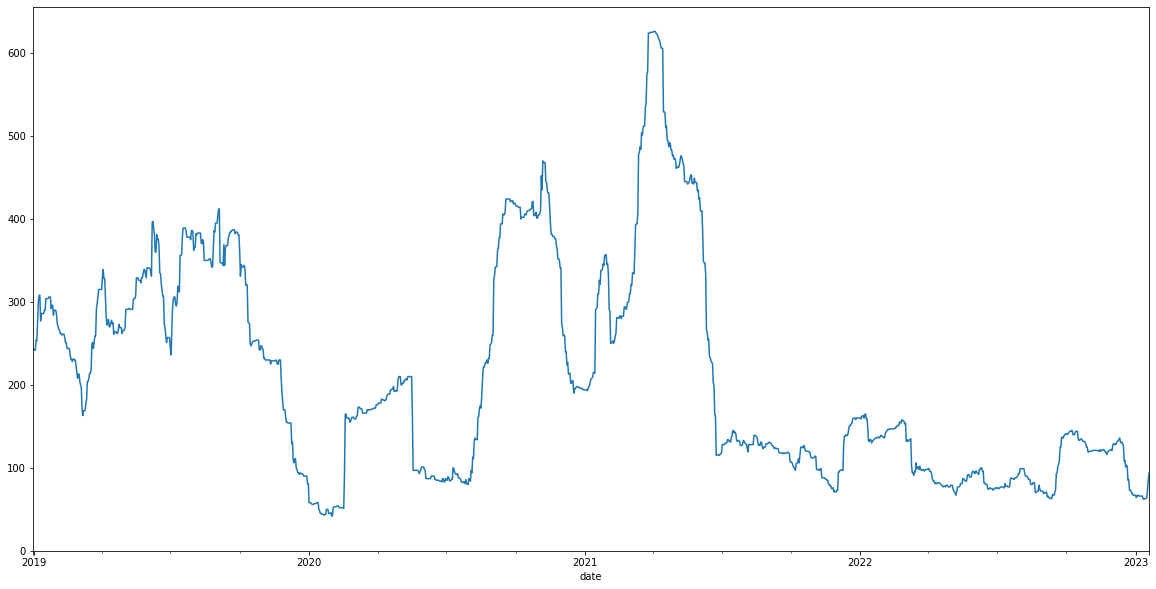

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = grouped-text-exercise; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = grouped-text-exercise; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

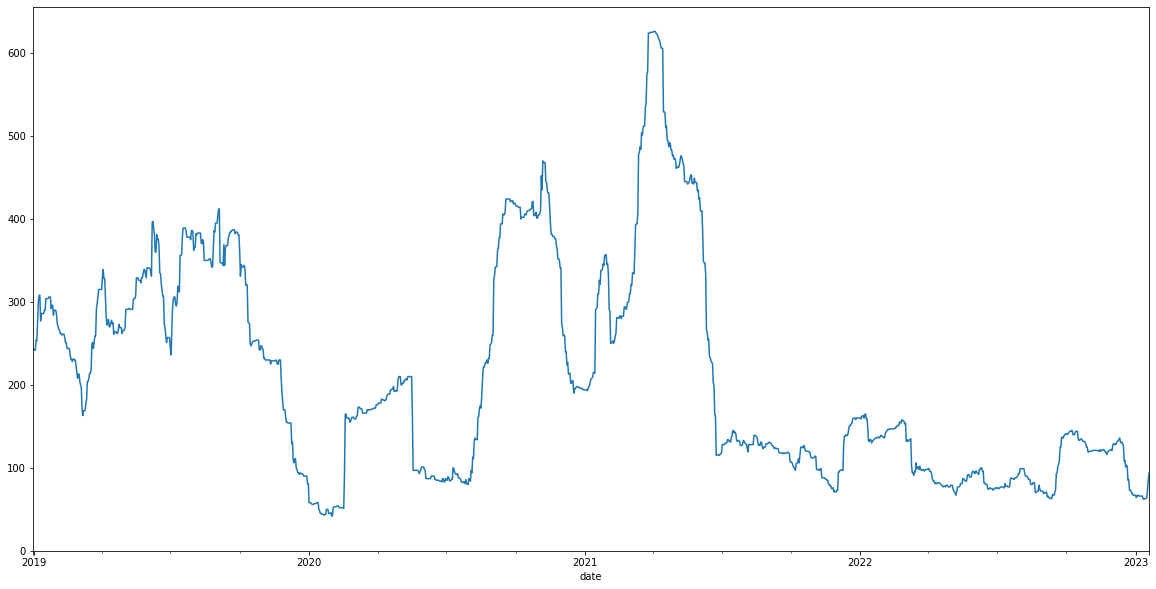

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

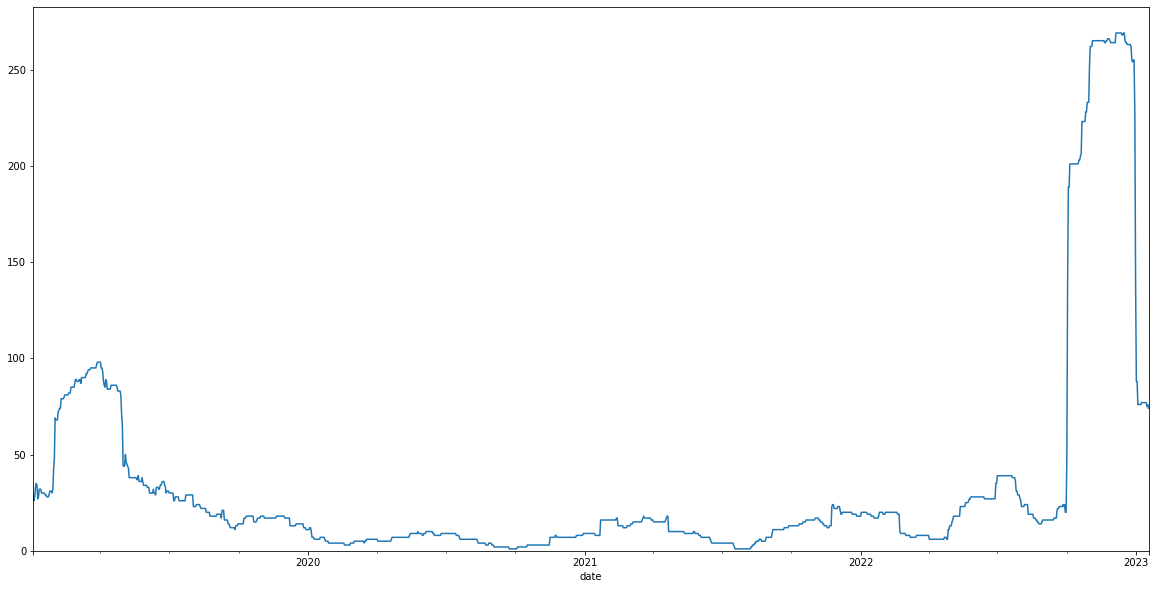

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

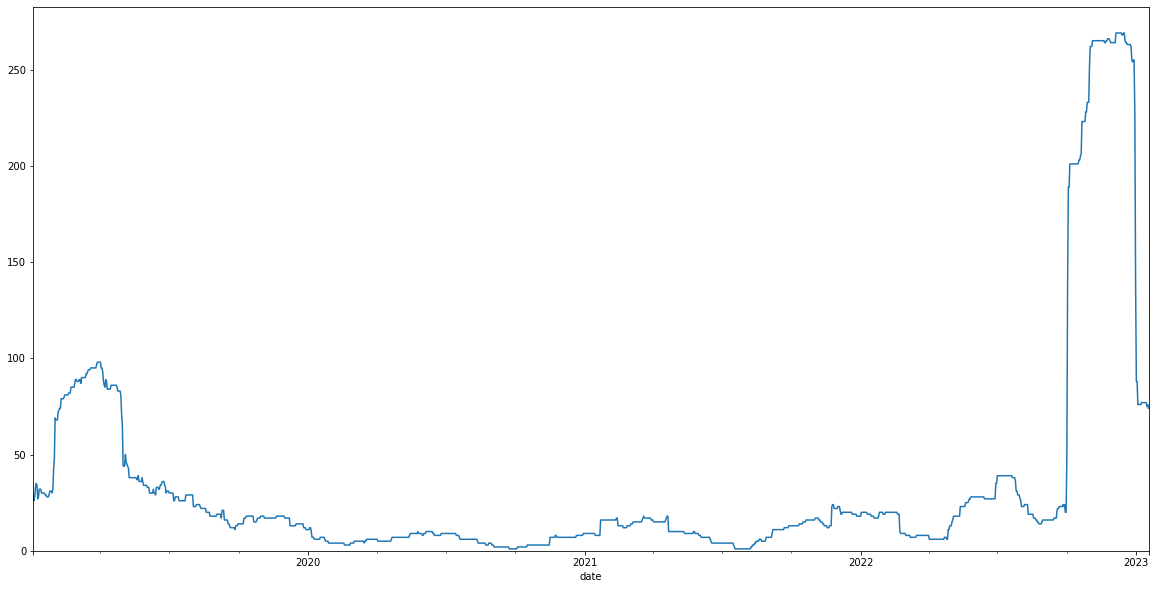

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course-page; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

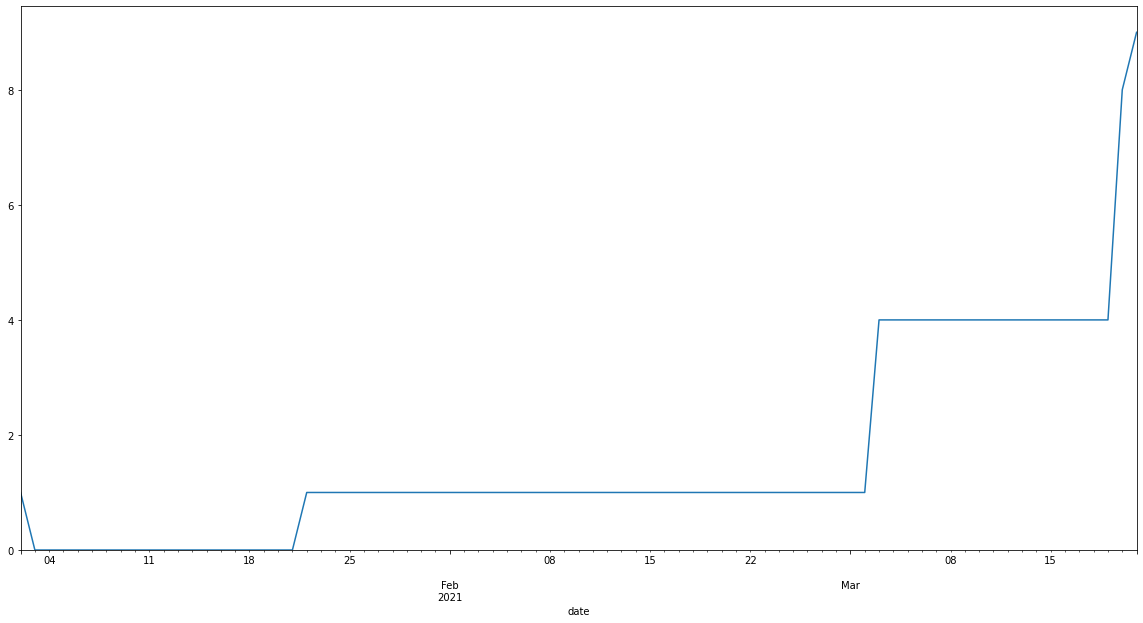

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course-page; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

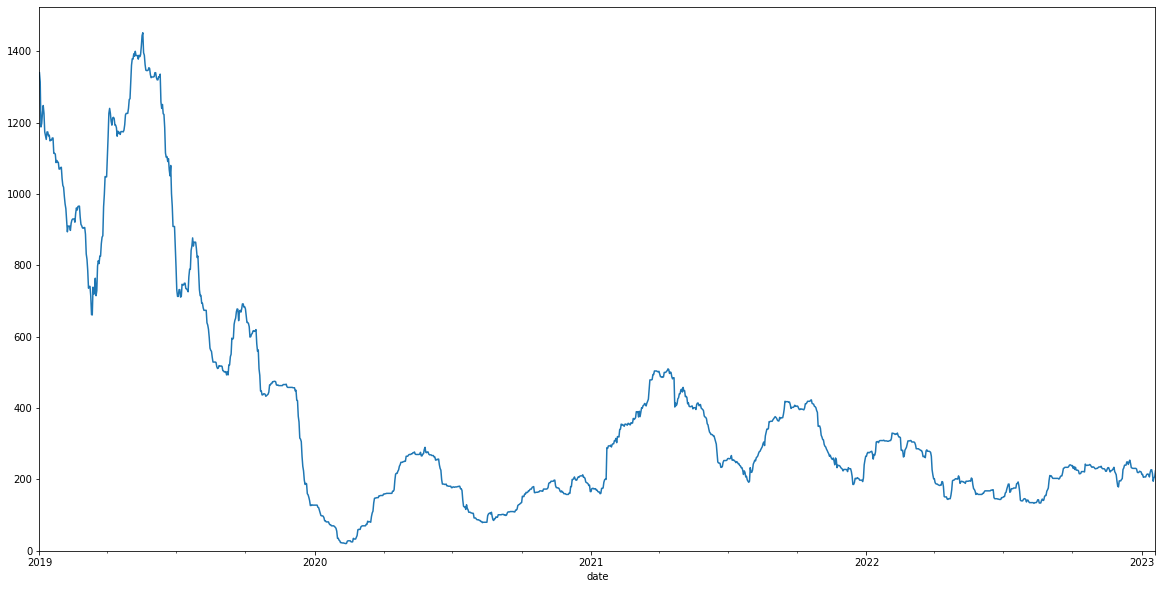

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course-page; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

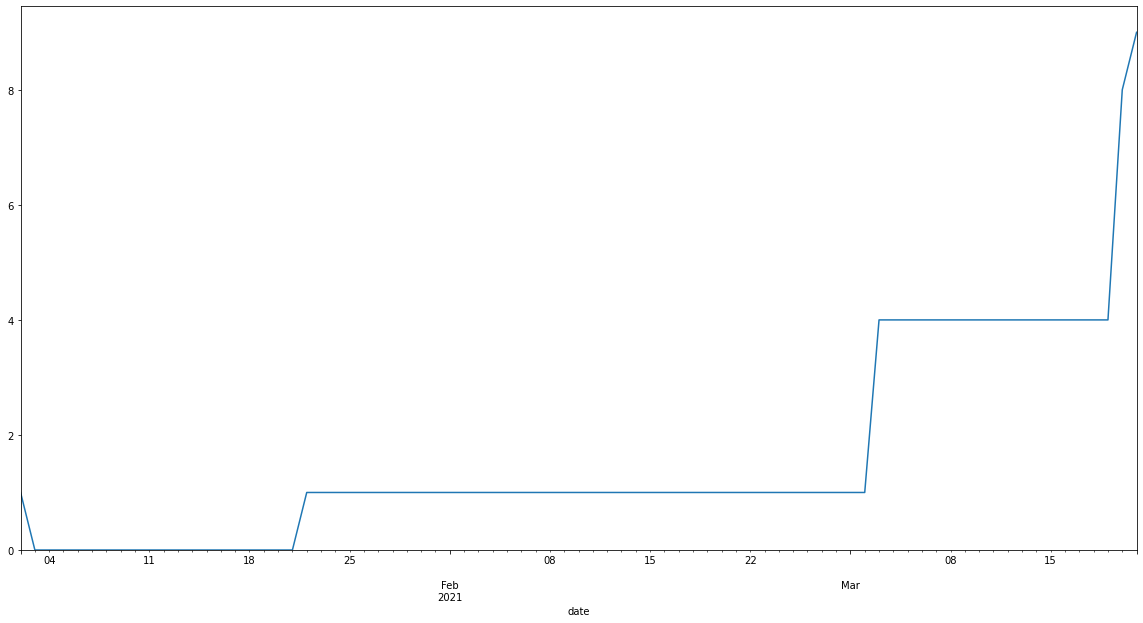

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = course-page; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

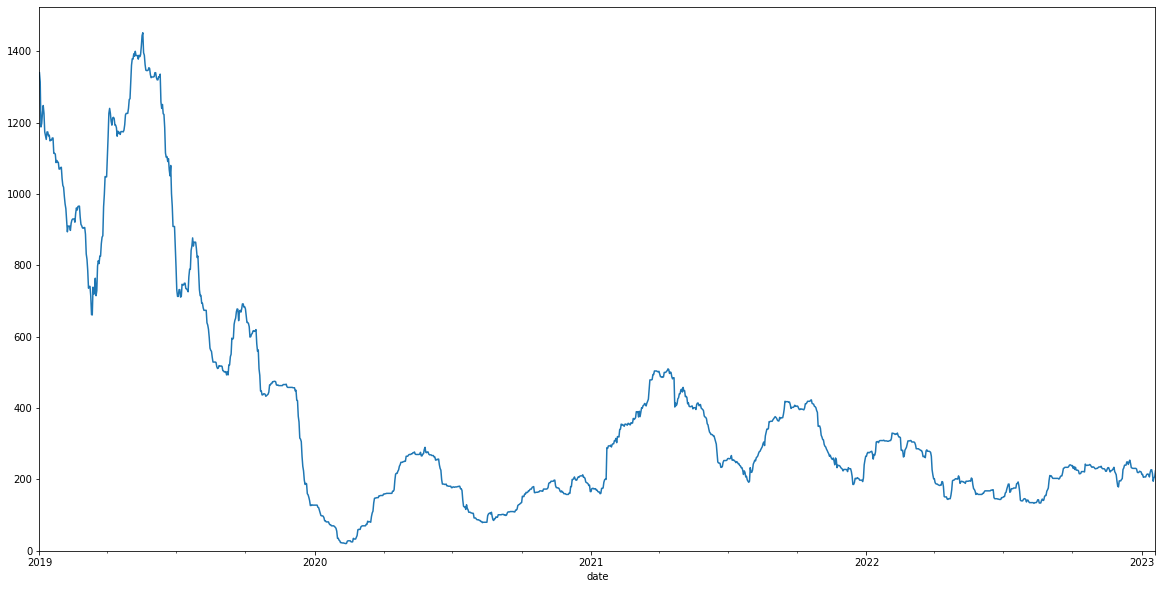

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise-group; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise-group; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

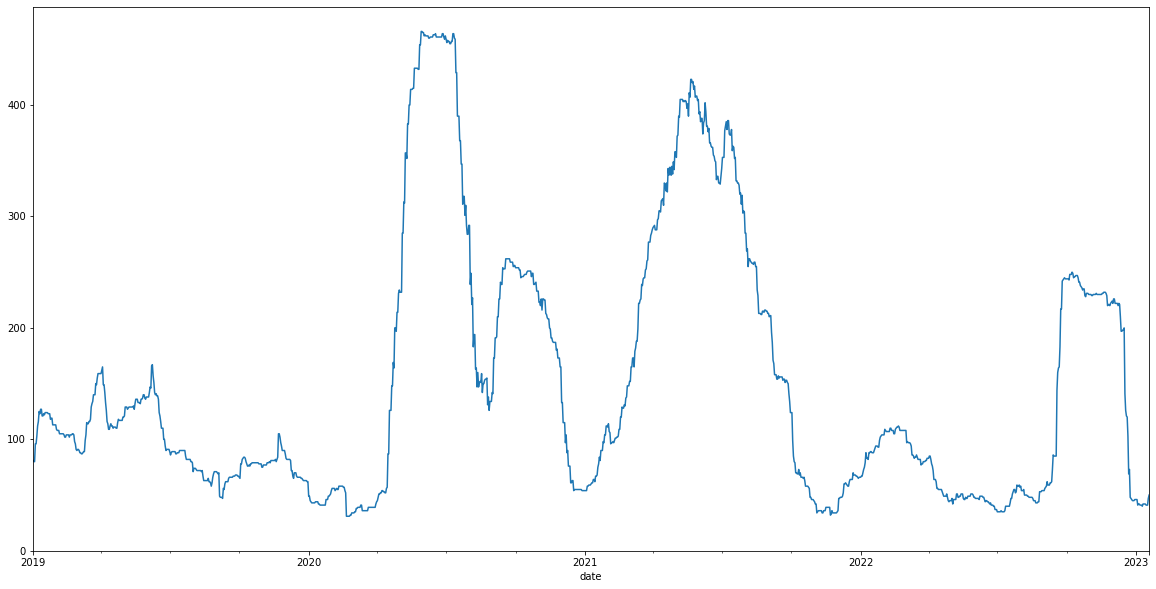

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise-group; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = text-exercise-group; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

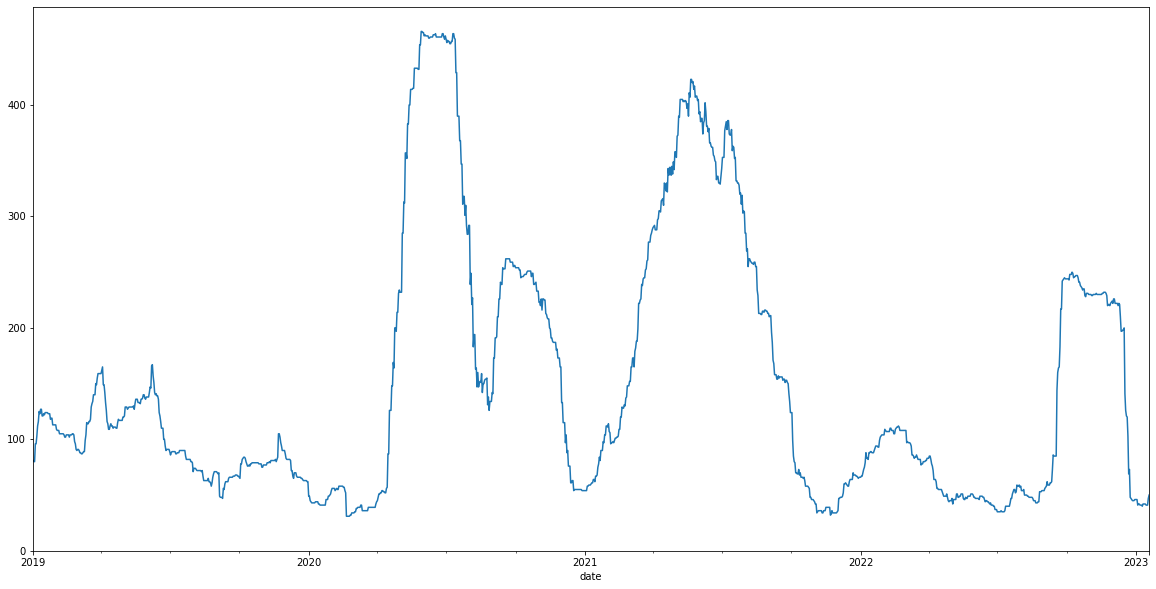

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-number-exact-match-challenge; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-number-exact-match-challenge; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

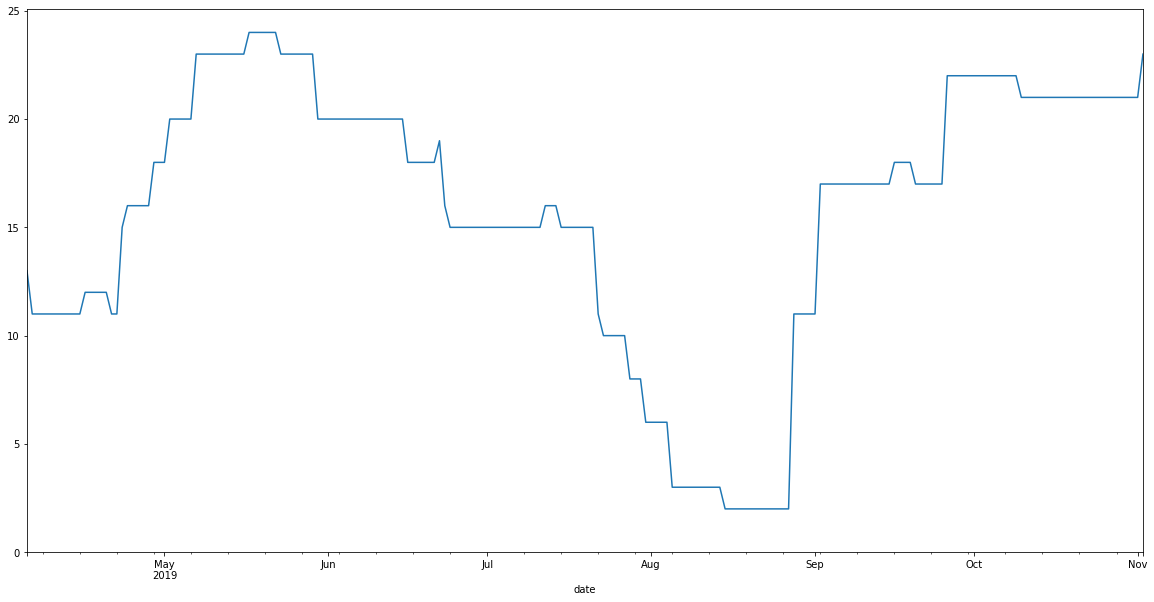

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-number-exact-match-challenge; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-number-exact-match-challenge; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

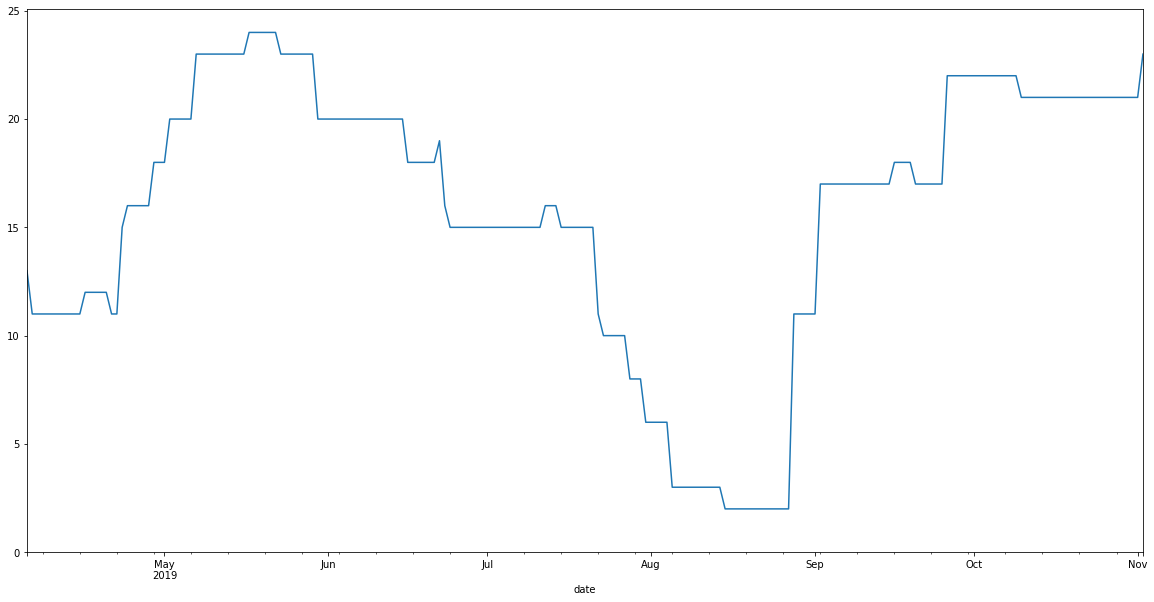

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-expression-equal-match-challenge; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-expression-equal-match-challenge; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

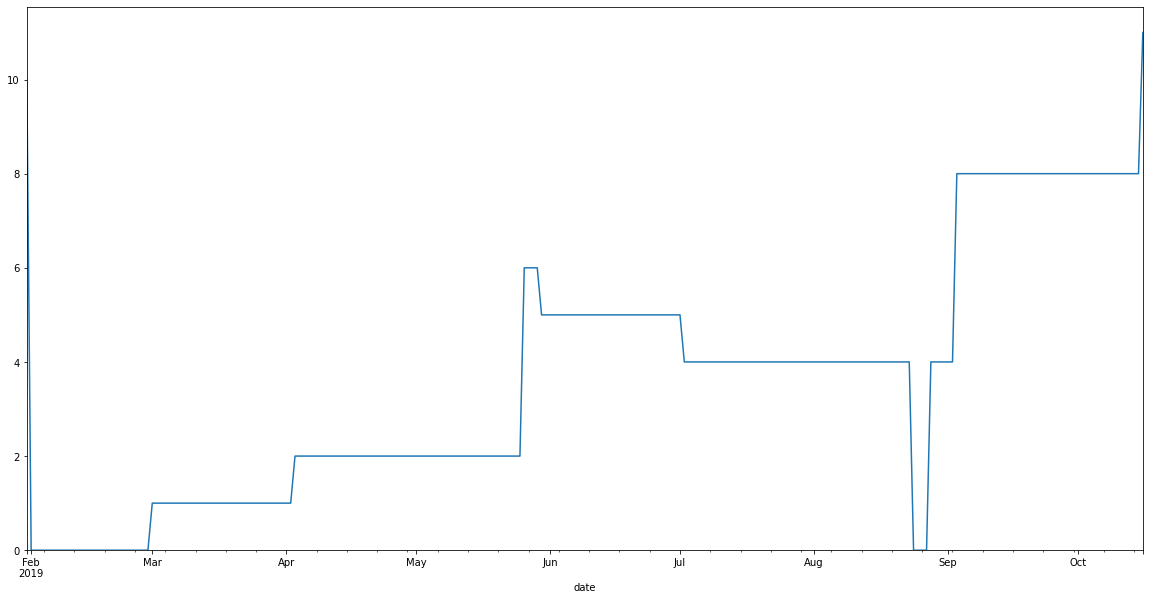

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-expression-equal-match-challenge; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-expression-equal-match-challenge; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

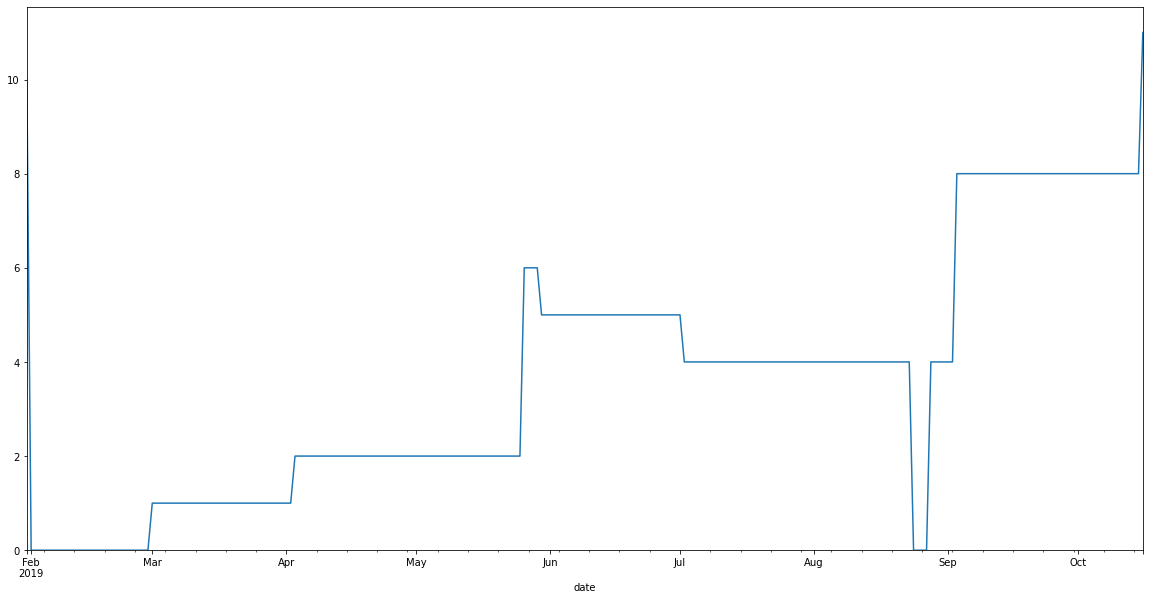

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = math-puzzle; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = math-puzzle; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = math-puzzle; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = math-puzzle; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-right-answer; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-right-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-right-answer; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-right-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-wrong-answer; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-wrong-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-wrong-answer; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = single-choice-wrong-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = video; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = video; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = video; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = video; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-wrong-answer; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-wrong-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-wrong-answer; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-wrong-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-right-answer; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-right-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-right-answer; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = multiple-choice-right-answer; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-string-normalized-match-challenge; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-string-normalized-match-challenge; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-string-normalized-match-challenge; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = input-string-normalized-match-challenge; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = applet; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = applet; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = applet; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = applet; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = event; Sprachversion=de; Nur Neuerstellungen; gelöscht + nicht gelöscht)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = event; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; gelöscht + nicht gelöscht)

Error while rendering diagram

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = event; Sprachversion=de; Nur Neuerstellungen; nur nicht gelöschte Inhalte)

Keine oder zu wenig Daten zum Anzeigen -> Keine Bearbeitungen

## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = event; Sprachversion=de; Nur Bearbeitungen bestehender Inhalte; nur nicht gelöschte Inhalte)

Error while rendering diagram

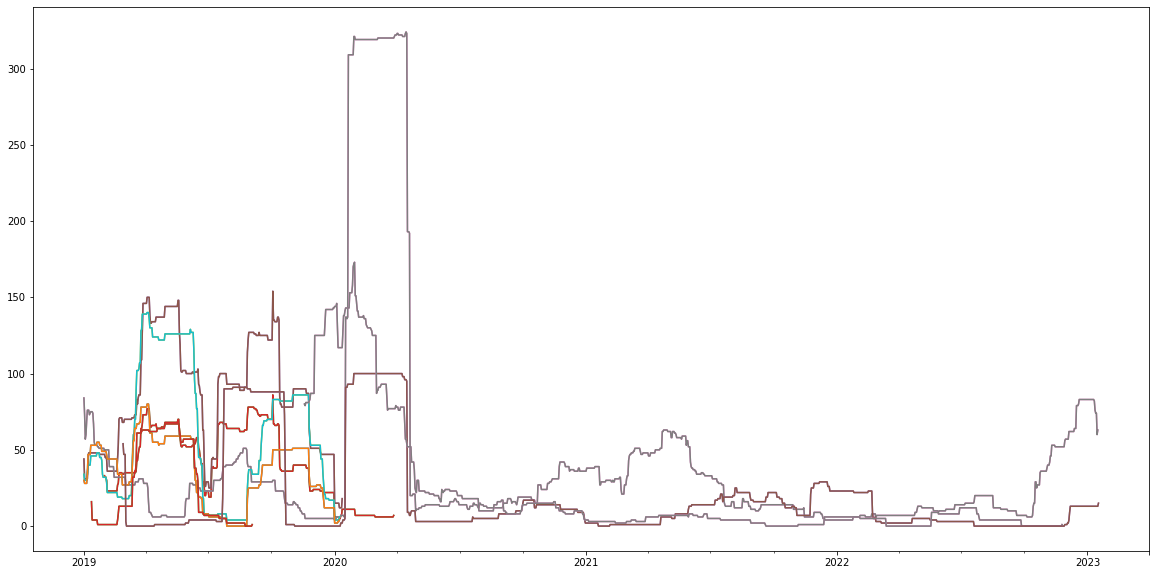

In [24]:
for entity_type in remove_none(d["entity_type"].unique()):
    for trashed in [None, 0]:
        trashed_message = "gelöscht + nicht gelöscht" if trashed == None else "nur nicht gelöschte Inhalte"

        for event_id in [4, 5]:
            event_message = "Nur Neuerstellungen" if event_id == 4 else "Nur Bearbeitungen bestehender Inhalte"

            m(f"## Verlauf Anzahl Bearbeitungen Summe 90 Tage (Inhaltstyp = {entity_type}; Sprachversion=de; {event_message}; {trashed_message})")
            show(d, event_id=event_id, trashed=trashed, entity_type=entity_type)